# ANALISIS MULTIVARIADO NUMERICO X NUMERICO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./dataset.csv",delimiter=";")

In [3]:
data.head()

SOCIO  CUENTA  AGENCIA  TIPO_SOCIO MONEDA  \
0         TORRES PUMA, JOSEPH   16927        1           1      S   
1        AROCCA PEREZ, MEDALY   17992        1           1      S   
2         CHOSEC TTITO, KAREN   27494        3           1      S   
3    CASTILLO SACA, ALEJANDRA   24538        3           1      S   
4  CARBAJAL CARDENAS, MARITZA   27564        3           1      S   

           PAGARE           PRODUCTO FEC_ULT_PAGO  TEA_INTERES  CUOTA_FIJA  \
0    01-    16945          MAS VELOZ   2021-11-10        69.39      121.22   
1    01-17776        CREDITO DIGITAL   2021-10-31       101.22      426.95   
2    03-0010240-2  RAPIDIN INVERSION   2024-04-24        45.93      484.19   
3    03-0010590        SEMANAL MICRO   2024-04-26       100.08      146.11   
4   03-   0010852   PAGA DIARIO (CT)   2024-04-20       125.22       19.32   

   ...  CUO_FALTANTES_VIGENTES NDIAS_ATRASADOS  MONTO_PRESTAMO SALDO_PRESTAMO  \
0  ...                       6             852          1100.0         623.95   
1  ...                       3             964          1650.0        1156.90   
2  ...                       3               0         11000.0        1017.69   
3  ...                       1              29          1100.0         142.18   
4  ...                       0               0           550.0           0.00   

  NRO_REPRO                      ANA_ORIGEN                 ANA_ACTUAL  \
0       NaN  BUSTAMANTE BACA, CESAR EDUARDO  PEÑA CANO, MENLY AMBERGAR   
1       NaN         GARCIA LINARES, RODRIGO       ZAGA BERRERAS, DANNY   
2       NaN          SALAS LECHUGA, MARIELA     SALAS LECHUGA, MARIELA   
3       NaN          SALAS LECHUGA, MARIELA     SALAS LECHUGA, MARIELA   
4       NaN       CARHUAS HUANQUI, FERNANDO  CARHUAS HUANQUI, FERNANDO   

         PROFESION                  OCUPACION  \
0      Controlador                CONTROLADOR   
1          Su Casa     COMERCIANTE DE GANADOS   
2      Comerciante              VENTA DE ROPA   
3      Comerciante            VENTA DE COMIDA   
4  No Especificada  VENTA DE COMIDAS ( POLLO)   

                              ACTIVIDAD_ECO  
0                   Empleado Sector Privado  
1                   Agricultura y Ganaderia  
2  Ambulantes y Puestos de Venta en Mercado  
3             Restaurante, Bares y Cantinas  
4                           Otros Servicios  

[5 rows x 29 columns]

In [4]:
data.NOM_FRECUENCIA.value_counts()

NOM_FRECUENCIA
DIAS         4535
MESES        3725
SEMANAS      1392
QUINCENAS      82
Name: count, dtype: int64

## DATOS DIARIOS
Separación de datos diarios del resto de datos

In [5]:
data_Frec= data.query('NOM_FRECUENCIA == "DIAS "')

In [6]:
##Version de pandas
pd.__version__

'2.2.1'

In [7]:
data_Frec.head()

SOCIO  CUENTA  AGENCIA  TIPO_SOCIO MONEDA  \
4      CARBAJAL CARDENAS, MARITZA   27564        3           1      S   
5   CASTILLO PAGUADA, CARMEN ROSA   23601        3           1      S   
7            CAPIONA TAFUR, ZOILA   17696        1           1      S   
8          HANCCO QUISPE, LUZMILA   28261        4           1      S   
9  DORADO VALDES, TERESA GEORGINA   24080        3           1      S   

           PAGARE          PRODUCTO FEC_ULT_PAGO  TEA_INTERES  CUOTA_FIJA  \
4   03-   0010852  PAGA DIARIO (CT)   2024-04-20       125.22       19.32   
5   03 -0010486-      MAS INCLUSIVO   2024-04-30       200.09       63.72   
7   03-000731-21   PAGA DIARIO (CT)   2021-11-09       213.84       20.99   
8   04-003244-24      MAS INCLUSIVO   2024-04-30       500.00       11.70   
9  00-0010235-  2     MAS INCLUSIVO   2024-04-26       213.84       14.91   

   ...  CUO_FALTANTES_VIGENTES NDIAS_ATRASADOS  MONTO_PRESTAMO SALDO_PRESTAMO  \
4  ...                       0               0           550.0           0.00   
5  ...                      20               0          3300.0        1154.67   
7  ...                      25             921          1100.0         486.24   
8  ...                       0               0           565.0         150.07   
9  ...                      28               0          1500.0         424.77   

  NRO_REPRO                              ANA_ORIGEN  \
4       NaN               CARHUAS HUANQUI, FERNANDO   
5       2.0                  SALAS LECHUGA, MARIELA   
7       NaN  VALVERDE PALOMINO, CHRISTIAM LAWERENCE   
8       NaN            HUALLPAYUNCA ZERECEDA, NANCY   
9       2.0        JUSTINIANI CORDOVA, BRIAN ANGELO   

                         ANA_ACTUAL        PROFESION  \
4         CARHUAS HUANQUI, FERNANDO  No Especificada   
5            SALAS LECHUGA, MARIELA  No Especificada   
7            AMAO CCANTO, CRISNELIA         No Tiene   
8      HUALLPAYUNCA ZERECEDA, NANCY      Comerciante   
9  JUSTINIANI CORDOVA, BRIAN ANGELO  No Especificada   

                   OCUPACION                  ACTIVIDAD_ECO  
4  VENTA DE COMIDAS ( POLLO)                Otros Servicios  
5                COMERCIANTE                      Boutiques  
7                   RESTOBAR  Restaurante, Bares y Cantinas  
8                COMERCIANTE                      Artesanos  
9                RESTAURANTE                Otros Servicios  

[5 rows x 29 columns]

In [8]:
data.NRO_REPRO.value_counts()

NRO_REPRO
1.0     1647
2.0      960
3.0      533
4.0      337
5.0      178
6.0       93
7.0       29
0.0       22
8.0       13
9.0        6
11.0       3
10.0       1
13.0       1
Name: count, dtype: int64

In [9]:
#Cantidad de variables unicas por columna
data.nunique()

SOCIO                     8618
CUENTA                    8618
AGENCIA                      7
TIPO_SOCIO                   4
MONEDA                       1
PAGARE                    9734
PRODUCTO                    38
FEC_ULT_PAGO               411
TEA_INTERES                958
CUOTA_FIJA                7955
DIAS                         4
NOM_FRECUENCIA               4
EDAD                        65
ESTADO_CIVIL                 6
SEXO                         3
TIPO_VIVIENDA                3
OTORGA                    1223
RIESGO_INDIVIDUAL            5
NCUO_ATRASADAS             111
CUO_FALTANTES_VIGENTES     198
NDIAS_ATRASADOS            547
MONTO_PRESTAMO            1244
SALDO_PRESTAMO            8176
NRO_REPRO                   13
ANA_ORIGEN                 168
ANA_ACTUAL                  83
PROFESION                   80
OCUPACION                 2900
ACTIVIDAD_ECO               37
dtype: int64

In [10]:
#sns.relplot(data=data, x="NRO_REPRO",y="EDAD", hue="SEXO")

In [11]:
pd.set_option('display.max_columns', None)
data_no_repro = data.query('NRO_REPRO.isna()')

In [12]:
data_no_repro.query('CUOTA_FIJA > 10 and NOM_FRECUENCIA == "DIAS "').sample(5)

SOCIO  CUENTA  AGENCIA  TIPO_SOCIO  \
5639                 CHACMANI CANAL, DORIS   18172        3           1   
9566  LOPEZ LUCAS DE RIMAIHUAMAN, PATRICIA   28990        8           1   
8175            CURI TACO, LUCERO MILAGROS   27215        5           1   
8065               BACA ELGUERA, SATURNINA   26964        5           1   
3061                HUAICHO RAMIREZ, NILDA   22729        2           1   

     MONEDA          PAGARE          PRODUCTO FEC_ULT_PAGO  TEA_INTERES  \
5639      S  03-0011091-24   PAGA DIARIO (CT)   2024-04-30       101.22   
9566      S  08-0000095-24      MAS INCLUSIVO   2024-04-30       289.60   
8175      S  05-004847-24    PAGA DIARIO (CT)   2024-04-23       101.22   
8065      S  05-004677-24       MAS INCLUSIVO   2024-04-30       213.84   
3061      S  02-0009814-24   PAGA DIARIO (CT)   2024-04-29       101.22   

      CUOTA_FIJA  DIAS NOM_FRECUENCIA  EDAD ESTADO_CIVIL SEXO TIPO_VIVIENDA  \
5639       38.29     1          DIAS     62  Soltero (a)    F        PROPIA   
9566       19.84     1          DIAS     46   Casado (a)    F      FAMILIAR   
8175       69.69     1          DIAS     27  Soltero (a)    F     ALQUILADA   
8065       30.12     1          DIAS     57  Soltero (a)    F      FAMILIAR   
3061      455.13     1          DIAS     34  Soltero (a)    F      FAMILIAR   

          OTORGA RIESGO_INDIVIDUAL  NCUO_ATRASADAS  CUO_FALTANTES_VIGENTES  \
5639  2024-04-03            NORMAL               1                       9   
9566  2024-04-04            NORMAL               0                       0   
8175  2024-02-14            NORMAL               0                       0   
8065  2024-01-17            NORMAL              12                      26   
3061  2024-03-13            NORMAL               4                      28   

      NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  NRO_REPRO  \
5639                0          1100.0          448.64        NaN   
9566                0           710.0          409.35        NaN   
8175                0          5525.0            0.00        NaN   
8065                0          2225.0          841.73        NaN   
3061                0         25000.0        13892.18        NaN   

                        ANA_ORIGEN                    ANA_ACTUAL  \
5639       TORRES CERVANTES, KATIA       TORRES CERVANTES, KATIA   
9566  AGUILAR CABALLERO, KAY SMITH  AGUILAR CABALLERO, KAY SMITH   
8175    CHAMPI BARAZORDA, GARDENIA    CHAMPI BARAZORDA, GARDENIA   
8065         TTITO LAURA, GIANNELA         TTITO LAURA, GIANNELA   
3061            TUNQUI SUCA, ERIKA            TUNQUI SUCA, ERIKA   

            PROFESION                  OCUPACION  \
5639      Comerciante                COMERCIANTE   
9566           Sastre             CONFECCIONISTA   
8175      Comerciante  VENTA DE ROCOTOS RELLENOS   
8065         No Tiene             VENTA DE JUGOS   
3061  No Especificada                 CARNICERIA   

                                 ACTIVIDAD_ECO  
5639                                    Bodega  
9566                                 Costurera  
8175  Ambulantes y Puestos de Venta en Mercado  
8065                           Otros Servicios  
3061                           Otros Servicios

In [13]:
#Datos nulos en Reprogramaciones
data_no_repro.isna().sum()

SOCIO                        0
CUENTA                       0
AGENCIA                      0
TIPO_SOCIO                   0
MONEDA                       0
PAGARE                       0
PRODUCTO                     0
FEC_ULT_PAGO                 0
TEA_INTERES                  0
CUOTA_FIJA                   0
DIAS                         0
NOM_FRECUENCIA               0
EDAD                         0
ESTADO_CIVIL                 0
SEXO                         0
TIPO_VIVIENDA                0
OTORGA                       0
RIESGO_INDIVIDUAL            0
NCUO_ATRASADAS               0
CUO_FALTANTES_VIGENTES       0
NDIAS_ATRASADOS              0
MONTO_PRESTAMO               0
SALDO_PRESTAMO               0
NRO_REPRO                 5911
ANA_ORIGEN                   0
ANA_ACTUAL                   0
PROFESION                    0
OCUPACION                  235
ACTIVIDAD_ECO                0
dtype: int64

In [14]:
#Separamos la data Numerica
n_data = data_no_repro.select_dtypes(include=[np.number])

In [15]:
n_data = n_data.drop(['CUENTA', 'AGENCIA', 'TIPO_SOCIO', 'DIAS'], axis=1)

In [16]:
n_data.describe()

TEA_INTERES    CUOTA_FIJA         EDAD  NCUO_ATRASADAS  \
count  5911.000000   5911.000000  5911.000000     5911.000000   
mean    138.684260    329.484613    40.499070        3.295043   
std      98.823549    591.384425    11.899194        9.300760   
min       0.000000      7.610000    18.000000        0.000000   
25%      67.460000     41.465000    31.000000        0.000000   
50%     100.080000    153.800000    39.000000        0.000000   
75%     200.090000    365.990000    49.000000        2.000000   
max     500.000000  11106.870000   104.000000      169.000000   

       CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  MONTO_PRESTAMO  \
count             5911.000000      5911.000000     5911.000000   
mean                17.491795        84.758078     4964.547119   
std                 24.317003       269.608238     7892.256047   
min                  0.000000         0.000000      200.000000   
25%                  3.000000         0.000000     1135.000000   
50%                  9.000000         0.000000     2225.000000   
75%                 21.000000         0.000000     5060.000000   
max                176.000000      2187.000000   145000.000000   

       SALDO_PRESTAMO  NRO_REPRO  
count     5911.000000        0.0  
mean      3039.119110        NaN  
std       5695.614171        NaN  
min          0.000000        NaN  
25%        477.050000        NaN  
50%       1234.330000        NaN  
75%       3051.155000        NaN  
max      90240.000000        NaN

In [17]:
n_data.query('EDAD > 100')

TEA_INTERES  CUOTA_FIJA  EDAD  NCUO_ATRASADAS  CUO_FALTANTES_VIGENTES  \
5111       200.09       58.66   104               4                       0   

      NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  NRO_REPRO  
5111                0          4400.0          409.04        NaN

In [18]:
n_data.corr()

TEA_INTERES  CUOTA_FIJA      EDAD  NCUO_ATRASADAS  \
TEA_INTERES                1.000000   -0.330755 -0.013567        0.172270   
CUOTA_FIJA                -0.330755    1.000000  0.009536       -0.126984   
EDAD                      -0.013567    0.009536  1.000000       -0.020978   
NCUO_ATRASADAS             0.172270   -0.126984 -0.020978        1.000000   
CUO_FALTANTES_VIGENTES     0.122713   -0.147340  0.022943        0.300446   
NDIAS_ATRASADOS           -0.090336   -0.037385 -0.023673        0.480576   
MONTO_PRESTAMO            -0.316173    0.713623  0.030198       -0.072982   
SALDO_PRESTAMO            -0.271899    0.583647  0.012965       -0.045532   
NRO_REPRO                       NaN         NaN       NaN             NaN   

                        CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  \
TEA_INTERES                           0.122713        -0.090336   
CUOTA_FIJA                           -0.147340        -0.037385   
EDAD                                  0.022943        -0.023673   
NCUO_ATRASADAS                        0.300446         0.480576   
CUO_FALTANTES_VIGENTES                1.000000         0.002766   
NDIAS_ATRASADOS                       0.002766         1.000000   
MONTO_PRESTAMO                        0.136538        -0.052175   
SALDO_PRESTAMO                        0.267412        -0.031376   
NRO_REPRO                                  NaN              NaN   

                        MONTO_PRESTAMO  SALDO_PRESTAMO  NRO_REPRO  
TEA_INTERES                  -0.316173       -0.271899        NaN  
CUOTA_FIJA                    0.713623        0.583647        NaN  
EDAD                          0.030198        0.012965        NaN  
NCUO_ATRASADAS               -0.072982       -0.045532        NaN  
CUO_FALTANTES_VIGENTES        0.136538        0.267412        NaN  
NDIAS_ATRASADOS              -0.052175       -0.031376        NaN  
MONTO_PRESTAMO                1.000000        0.844264        NaN  
SALDO_PRESTAMO                0.844264        1.000000        NaN  
NRO_REPRO                          NaN             NaN        NaN

In [19]:
n_data.drop(['NRO_REPRO'],axis=1,inplace=True)

In [20]:
n_data.nunique(object == np.number)

TEA_INTERES                668
CUOTA_FIJA                5079
EDAD                        62
NCUO_ATRASADAS              81
CUO_FALTANTES_VIGENTES     145
NDIAS_ATRASADOS            441
MONTO_PRESTAMO             891
SALDO_PRESTAMO            4590
dtype: int64

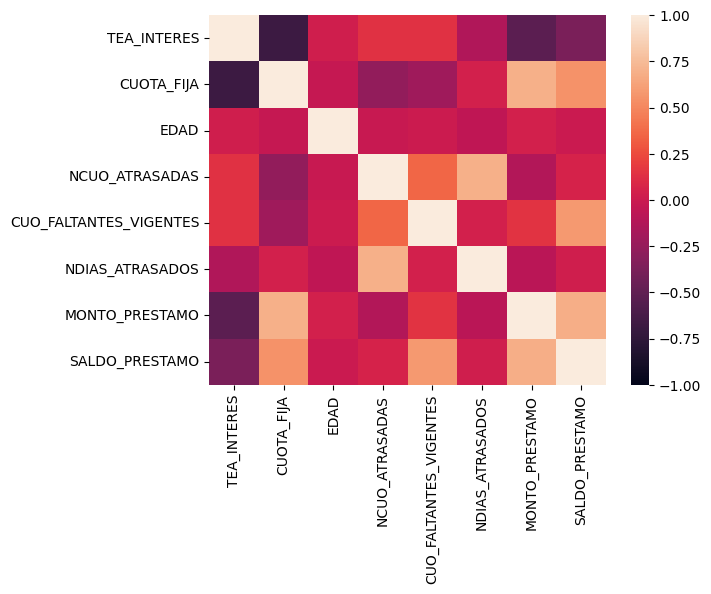

In [21]:
ax = sns.heatmap(n_data.corr(method="spearman"), vmin=-1, vmax=1);

In [22]:
def visualizar_datos(data):
     column_labels = [col.split('_')[0] for col in n_data.columns]
     return column_labels

<Axes: >

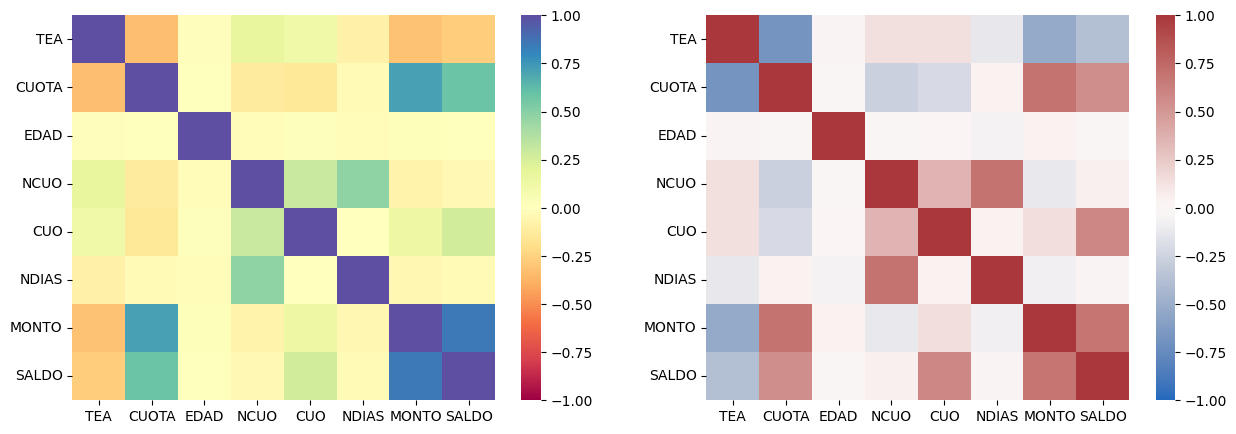

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
column_labels = [col.split('_')[0] for col in n_data.columns]
sns.heatmap(n_data.corr(method="pearson"), vmin=-1, vmax=1, cmap="Spectral", ax=axs[0],xticklabels=column_labels, yticklabels=column_labels)
sns.heatmap(n_data.corr(method="spearman"), vmin=-1, vmax=1, cmap="vlag", ax=axs[1],xticklabels=column_labels, yticklabels=column_labels)

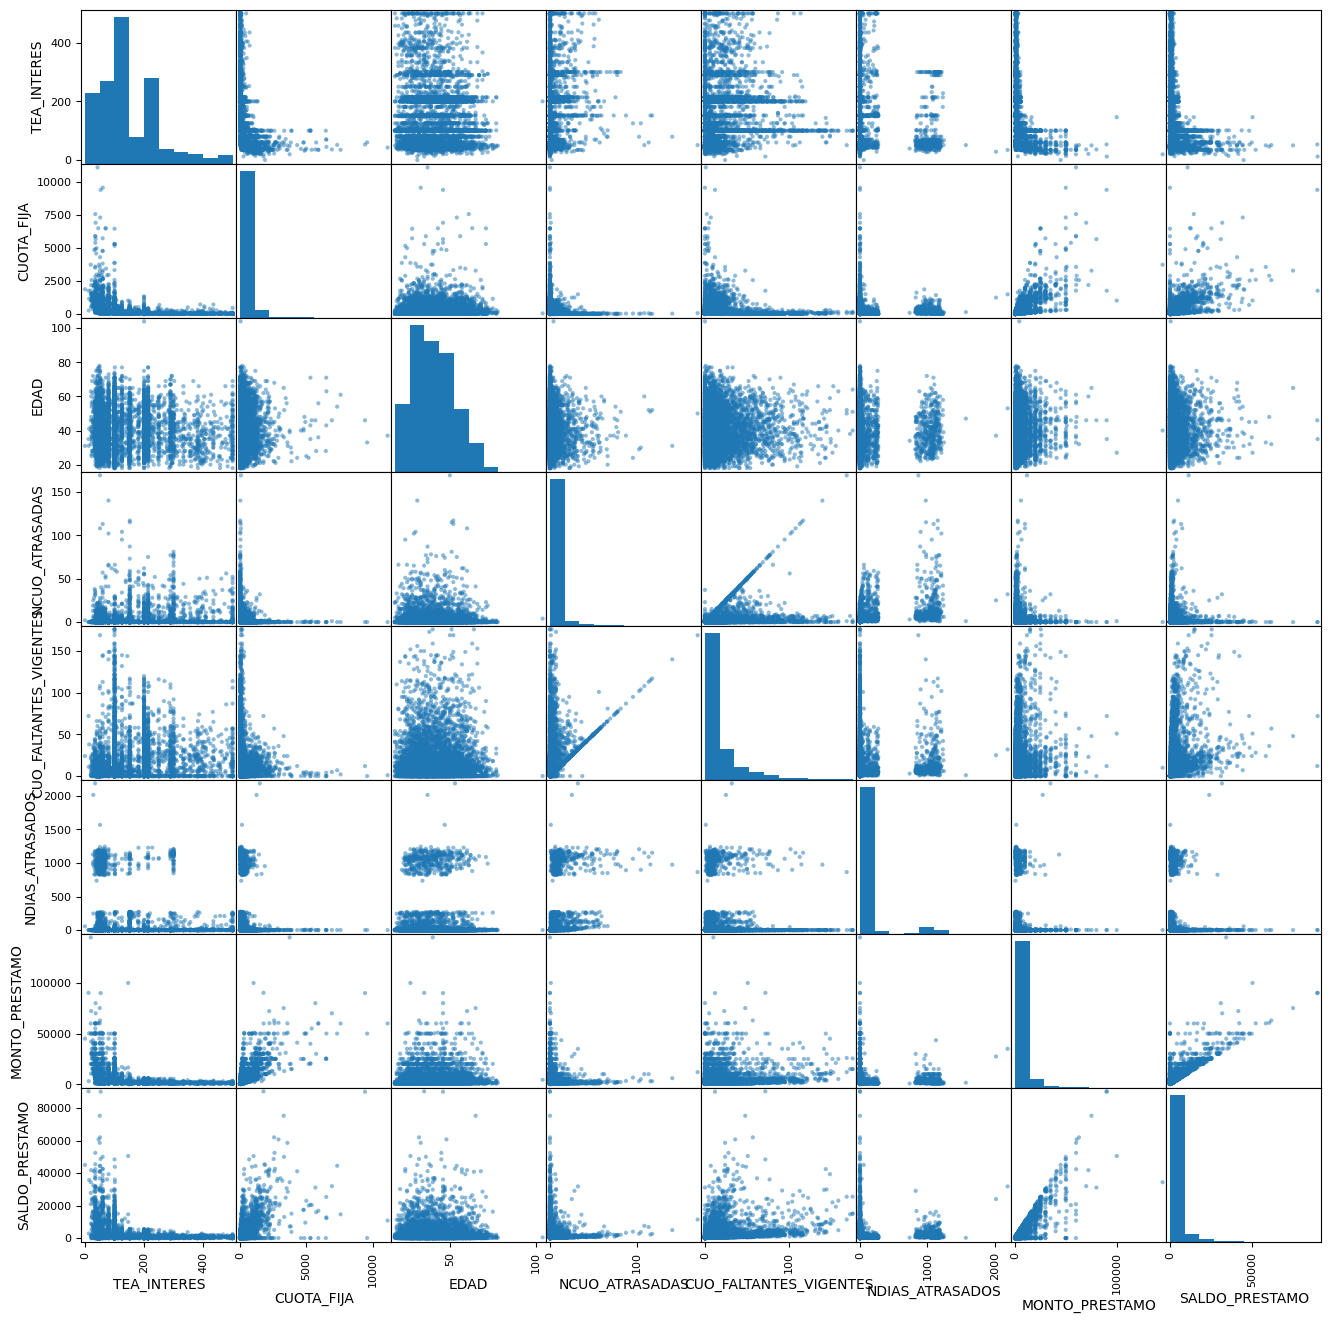

In [24]:
pd.plotting.scatter_matrix(n_data, figsize=(16,16),diagonal ="hist");

In [25]:
Q1 = n_data['NCUO_ATRASADAS']
Q2 = n_data.quantile(0.50)
Q3 = n_data.quantile(0.75)

In [26]:
Q1

0        6
1        3
2        0
3        1
4        0
        ..
9659     0
9660     0
9661     0
9662     0
9733    29
Name: NCUO_ATRASADAS, Length: 5911, dtype: int64

In [27]:
# def cuartil(df):
#     Q1=df.quantile(0.25)
#     Q2=df.quantile(0.50)
#     Q3=df.quantile(0.75)
#     n_data_q1 = df[df <= Q1]
#     n_data_q2 = (df > Q1) & df <= Q2
#     n_data_q3 = df[df >= Q3]
#     return n_data_q1, n_data_q2, n_data_q3

In [28]:
def cuartil(df, column):
    # Calcular los cuartiles
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.50)
    Q3 = df[column].quantile(0.75)

    # Filtrar los datos por cuartiles
    n_data_q1 = df[df[column] <= Q1]
    n_data_q2 = df[(df[column] > Q1) & (df[column] <= Q2)]
    n_data_q3 = df[df[column] > Q2]

    return n_data_q1, n_data_q2, n_data_q3

### CUOTAS ATRASADAS X TEA INTERES

In [29]:
n_data['NCUO_ATRASADAS'].quantile(0.6)

1.0

In [30]:
def correl(df, column1, column2):
    pearson = df[column1].corr(df[column2], method="pearson")
    sperman = df[column1].corr(df[column2], method="spearman")
    return pearson, sperman

In [31]:
q1, q2, q3 = cuartil(n_data,'TEA_INTERES')
correl(q1,'NCUO_ATRASADAS','TEA_INTERES')

(0.12124490371506884, 0.2278255135886961)

Text(0.5, 1.0, 'Quartil 3')

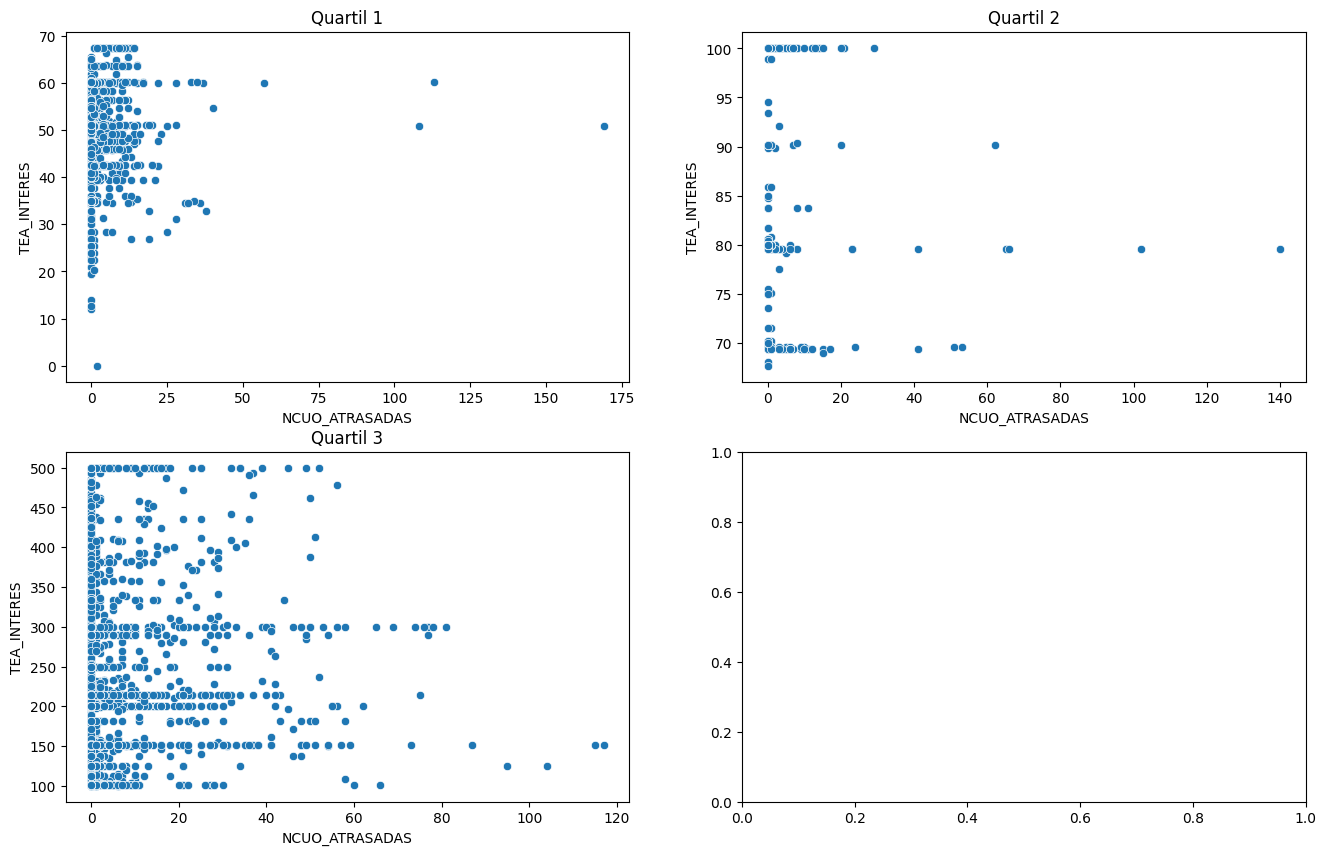

In [32]:
fig, axs = plt.subplots(2,2, figsize=(16,10))
ax = sns.scatterplot(data=q1, x='NCUO_ATRASADAS', y='TEA_INTERES', ax=axs[0][0]);
axs[0, 0].set_title("Quartil 1")
ax = sns.scatterplot(data=q2, x='NCUO_ATRASADAS', y='TEA_INTERES', ax=axs[0][1]);
axs[0, 1].set_title("Quartil 2")
ax = sns.scatterplot(data=q3, x='NCUO_ATRASADAS', y='TEA_INTERES', ax=axs[1][0]);
axs[1, 0].set_title("Quartil 3")

In [33]:
df1 = n_data.query('NCUO_ATRASADAS > 1 & NCUO_ATRASADAS <= 80')
q1,q2,q3=cuartil(df1,'TEA_INTERES')

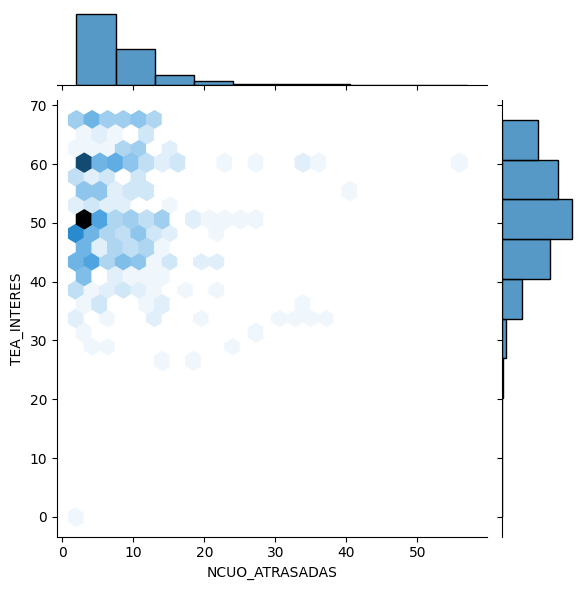

In [34]:
# data_1 = q1.query('NCUO_ATRASADAS > 1 & NCUO_ATRASADAS <= 80')
# Mapa hexagonal sobre el dataframe filtrado
ax = sns.jointplot(x=q1['NCUO_ATRASADAS'], y=q1['TEA_INTERES'], 
                   kind="hex", # Para obtener un mapa hexagonal
                   marginal_kws=dict(bins=10), # Número de bins
                  )

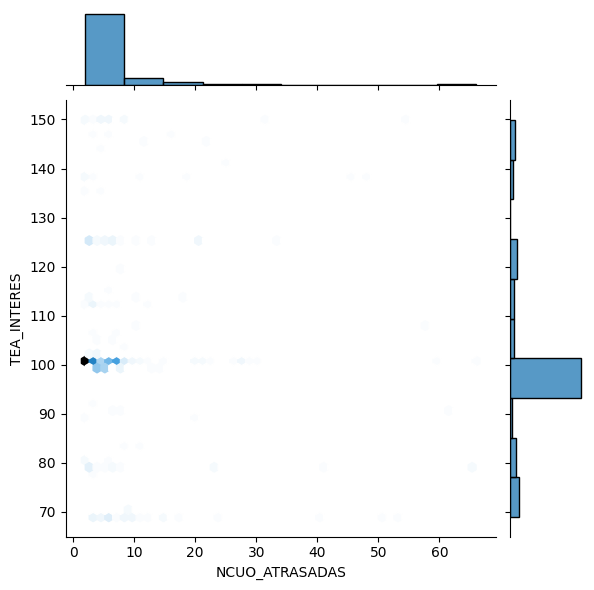

In [35]:
data_1 = q2.query('NCUO_ATRASADAS > 1 & NCUO_ATRASADAS <= 80')
# Mapa hexagonal sobre el dataframe filtrado
ax = sns.jointplot(x=q2['NCUO_ATRASADAS'], y=q2['TEA_INTERES'], 
                   kind="hex", # Para obtener un mapa hexagonal
                   marginal_kws=dict(bins=10), # Número de bins
                  )

In [36]:
data_1 = q3.query('NCUO_ATRASADAS > 1 & NCUO_ATRASADAS <= 80')
# Mapa hexagonal sobre el dataframe filtrado
ax = sns.jointplot(x=data_1['NCUO_ATRASADAS'], y=data_1['TEA_INTERES'], 
                   kind="hex", # Para obtener un mapa hexagonal
                   marginal_kws=dict(bins=10), # Número de bins
                  )

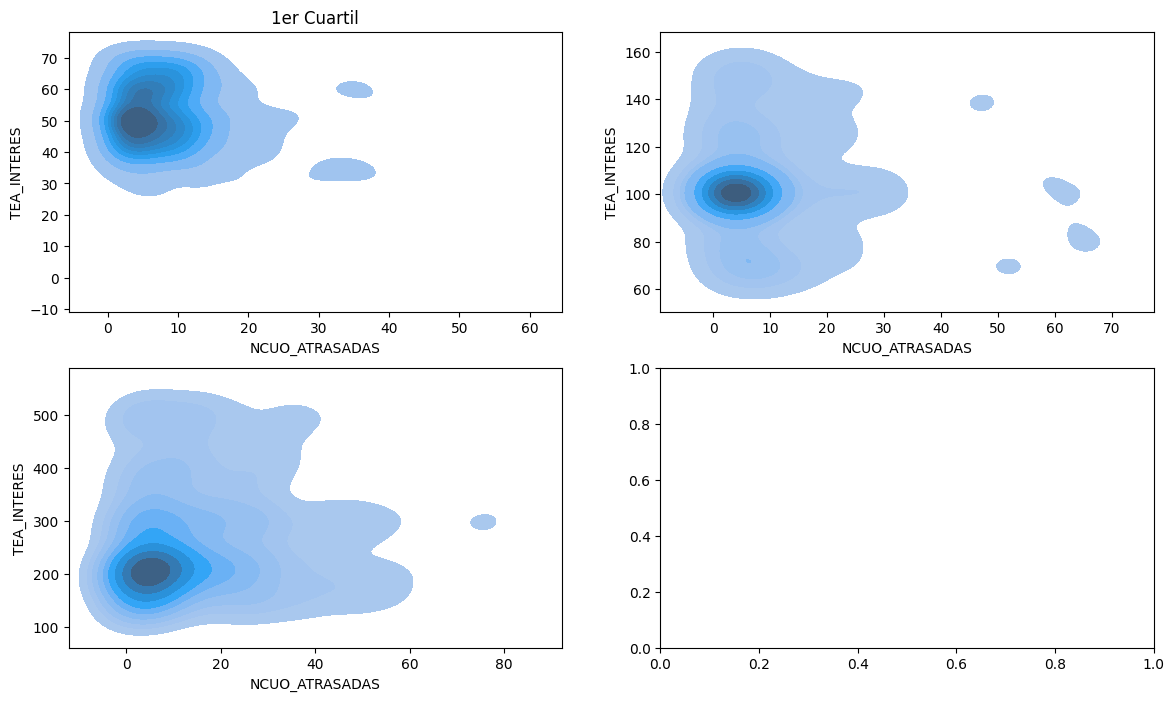

In [37]:
fig, axs = plt.subplots(2,2, figsize=(14,8));
ax = sns.kdeplot(x=q1['NCUO_ATRASADAS'], y=q1['TEA_INTERES'], fill=True, ax=axs[0][0])
axs[0,0].set_title('1er Cuartil')
ax = sns.kdeplot(x=q2['NCUO_ATRASADAS'], y=q2['TEA_INTERES'], fill=True, ax=axs[0][1])
#axs[0,0].set_title('2do Cuartil')
ax = sns.kdeplot(x=q3['NCUO_ATRASADAS'], y=q3['TEA_INTERES'], fill=True, ax=axs[1][0])
#axs[0,0].set_title('3er Cuartil')

### CUOTA_FIJA X MONTO DE PRESTAMO

In [38]:
n_data['CUOTA_FIJA'].corr(n_data['MONTO_PRESTAMO'], method="pearson")

0.7136230926044994

In [39]:
q1, q2, q3=cuartil(n_data,'MONTO_PRESTAMO')

In [40]:
f, axs = plt.subplots(3,2,figsize = (14,12))
sns.scatterplot(data=q1, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=axs[0,0])
axs[0,0].set_title("Correlación Raw")
sns.scatterplot(data=q1, x=np.log(q1['CUOTA_FIJA']), y='MONTO_PRESTAMO', ax=axs[0,1])
axs[0,1].set_title("Correlación Logarítmica")

sns.scatterplot(data=q2, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=axs[1,0])
# axs[1,0].set_title("Correlación Raw")
sns.scatterplot(data=q2, x=np.log(q2['CUOTA_FIJA']), y='MONTO_PRESTAMO', ax=axs[1,1])
# axs[1,1].set_title("Correlación Logarítmica")

sns.scatterplot(data=q3, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=axs[2,0])
# axs[2,0].set_title("Correlación Raw")
sns.scatterplot(data=q3, x=np.log(q3['CUOTA_FIJA']), y='MONTO_PRESTAMO', ax=axs[2,1])
# axs[2,1].set_title("Correlación Logarítmica")

<Axes: xlabel='CUOTA_FIJA', ylabel='MONTO_PRESTAMO'>

In [41]:
data_2 = n_data.query('MONTO_PRESTAMO < 10000')
q1, q2, q3=cuartil(data_2,'MONTO_PRESTAMO')

<Axes: xlabel='CUOTA_FIJA', ylabel='MONTO_PRESTAMO'>

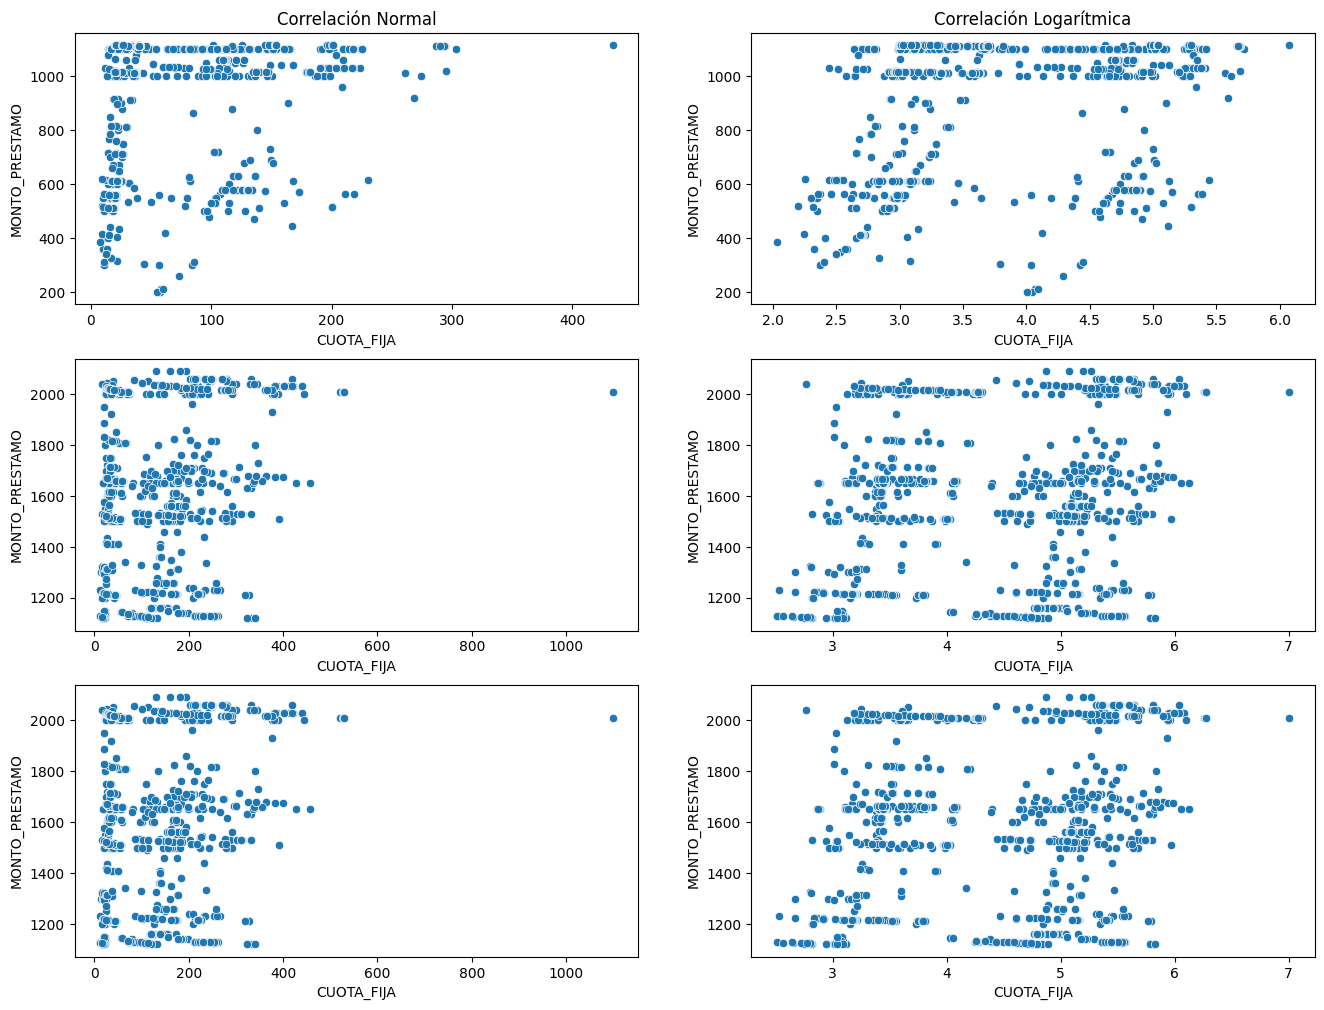

In [42]:
f, axs = plt.subplots(3,2,figsize = (16,12))
sns.scatterplot(data=q1, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=axs[0,0])
axs[0,0].set_title("Correlación Normal")
sns.scatterplot(data=q1, x=np.log(q1['CUOTA_FIJA']), y='MONTO_PRESTAMO', ax=axs[0,1])
axs[0,1].set_title("Correlación Logarítmica")

sns.scatterplot(data=q2, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=axs[1,0])
# axs[1,0].set_title("Correlación Normal")
sns.scatterplot(data=q2, x=np.log(q2['CUOTA_FIJA']), y='MONTO_PRESTAMO', ax=axs[1,1])
# axs[1,1].set_title("Correlación Logarítmica")

sns.scatterplot(data=q2, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=axs[2,0])
# axs[2,0].set_title("Correlación Normal")
sns.scatterplot(data=q2, x=np.log(q2['CUOTA_FIJA']), y='MONTO_PRESTAMO', ax=axs[2,1])
# axs[2,1].set_title("Correlación Logarítmica")

In [43]:
data_2.loc[(data_2['MONTO_PRESTAMO'] > 8000) & (data_2['CUOTA_FIJA'] < 250)]

TEA_INTERES  CUOTA_FIJA  EDAD  NCUO_ATRASADAS  CUO_FALTANTES_VIGENTES  \
1446       126.36       68.00    48               1                      86   
1609       125.22      150.97    45               0                       0   
1616       100.08       66.10    44               5                     116   
1872       101.22      202.09    31               1                      59   
1958       126.49       89.01    50               0                      82   
2008       112.91      157.37    45               3                      52   
4289        51.11      203.97    43               2                      36   
4460       100.08       56.99    24               7                       0   
4782        42.58      195.04    37               0                       0   
4993        60.10       57.90    48               0                      51   
5106       125.22      119.05    36               0                       0   
5475       100.08      139.36    29               3                      38   
5527       100.08      177.87    56               4                      35   
5650       100.08      110.82    59               3                      72   
5926       101.22      164.12    33               0                       0   
6141       100.08      163.48    33               2                      53   
7807        50.93       56.96    55              14                      37   
7977       151.82      108.32    47               0                       0   
9589       100.08      218.67    61               0                      57   

      NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  
1446                0          8500.0         5358.95  
1609                0          8820.0            0.00  
1616                0          8500.0         6633.74  
1872                3          8615.0         8293.70  
1958                0          8830.0         7149.12  
2008                0          9920.0         8206.95  
4289                7          9000.0         6634.08  
4460                0          8045.0         6340.85  
4782                0          8800.0            0.00  
4993                0          8800.0         2964.60  
5106                0          8800.0            0.00  
5475                0          8800.0         5309.59  
5527                0          9900.0         6313.08  
5650                0          8800.0         7490.56  
5926                0          9015.0            0.00  
6141                0          9015.0         8611.42  
7807                0          8845.0         2914.05  
7977                0          9025.0            0.00  
9589                0          8905.0         8710.42

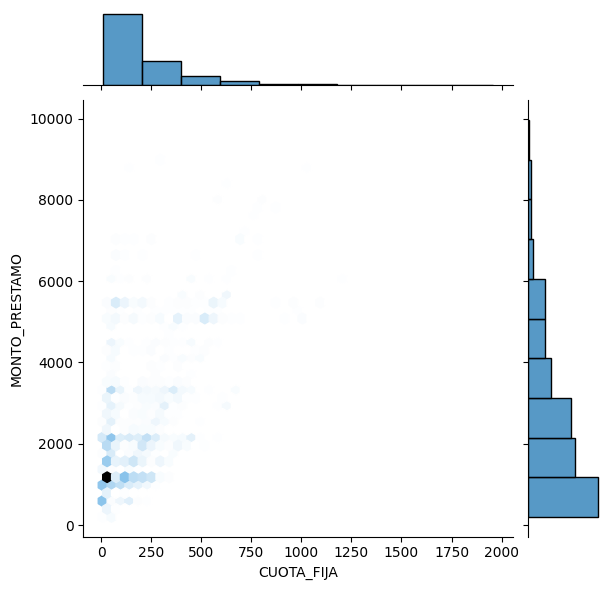

In [44]:
# Mapa hexagonal sobre el dataframe filtrado
ax = sns.jointplot(x=data_2['CUOTA_FIJA'], y=data_2['MONTO_PRESTAMO'], 
                   kind="hex", # Para obtener un mapa hexagonal
                   marginal_kws=dict(bins=10), # Número de bins
                  )

### SALDO PRESTADO X CUOTA FIJA

In [45]:
n_data['SALDO_PRESTAMO'].corr(n_data['CUOTA_FIJA'])

0.5836473571946241

In [46]:
q1,q2,q3 = cuartil(n_data, 'CUOTA_FIJA')
print('1er Cuartil: ' + str(correl(q1, 'SALDO_PRESTAMO', 'CUOTA_FIJA')) + 
      '\n2do Cuartil: ' + str(correl(q2, 'SALDO_PRESTAMO', 'CUOTA_FIJA')) + 
      '\n3er Cuartil: ' + str(correl(q3, 'SALDO_PRESTAMO', 'CUOTA_FIJA')))

1er Cuartil: (0.20906991989553514, 0.1383207097020158)
2do Cuartil: (0.010157525642998615, -0.048913670649196134)
3er Cuartil: (0.5280986211436446, 0.5361106206664972)


In [47]:
f, axs = plt.subplots(3,2,figsize = (16,12))
sns.scatterplot(data=q1, x='CUOTA_FIJA', y='SALDO_PRESTAMO', ax=axs[0,0])
sns.regplot(data=q1, x='CUOTA_FIJA', y='SALDO_PRESTAMO', ax=axs[0,0], color="red",scatter=False)
axs[0,0].set_title("Correlación Normal")
sns.scatterplot(data=q1, x=np.log(q1['CUOTA_FIJA']), y='SALDO_PRESTAMO', ax=axs[0,1])
sns.regplot(data=q1, x=np.log(q1['CUOTA_FIJA']), y='SALDO_PRESTAMO', ax=axs[0,1], color="red",scatter=False)
axs[0,1].set_title("Correlación Logarítmica")

sns.scatterplot(data=q2, x='CUOTA_FIJA', y='SALDO_PRESTAMO', ax=axs[1,0])
sns.regplot(data=q2, x='CUOTA_FIJA', y='SALDO_PRESTAMO', ax=axs[1,0], color="red",scatter=False)
sns.scatterplot(data=q2, x=np.log(q2['CUOTA_FIJA']), y='SALDO_PRESTAMO', ax=axs[1,1])
sns.regplot(data=q2, x=np.log(q2['CUOTA_FIJA']), y='SALDO_PRESTAMO', ax=axs[1,1], color="red",scatter=False)

sns.scatterplot(data=q3, x='CUOTA_FIJA', y='SALDO_PRESTAMO', ax=axs[2,0])
sns.regplot(data=q3, x='CUOTA_FIJA', y='SALDO_PRESTAMO', ax=axs[2,0], color="red",scatter=False)
sns.scatterplot(data=q3, x=np.log(q3['CUOTA_FIJA']), y='SALDO_PRESTAMO', ax=axs[2,1])
sns.regplot(data=q3, x=np.log(q3['CUOTA_FIJA']), y='SALDO_PRESTAMO', ax=axs[2,1], color="red",scatter=False)

<Axes: xlabel='CUOTA_FIJA', ylabel='SALDO_PRESTAMO'>

In [48]:
fig, axs = plt.subplots(2,2,figsize=(14,10))
ax = sns.kdeplot(x=q1['NCUO_ATRASADAS'], y=q1['TEA_INTERES'], fill=True, ax= axs[0,0])
ax = sns.kdeplot(x=q2['NCUO_ATRASADAS'], y=q2['TEA_INTERES'], fill=True, ax= axs[0,1])
ax = sns.kdeplot(x=q3['NCUO_ATRASADAS'], y=q3['TEA_INTERES'], fill=True, ax= axs[1,0])
ax = sns.kdeplot(x=data_1['NCUO_ATRASADAS'], y=data_1['TEA_INTERES'], fill=True, ax= axs[1,1])

### SALDO PRESTAMO X MONTO PRESTAMO

In [49]:
n_data['SALDO_PRESTAMO'].corr(n_data['MONTO_PRESTAMO'],method="spearman")

0.6799801078702301

In [50]:
data_3 = n_data.query('SALDO_PRESTAMO > 0')
q1,q2,q3 = cuartil(data_3, 'SALDO_PRESTAMO')

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='SALDO_PRESTAMO', ylabel='MONTO_PRESTAMO'>

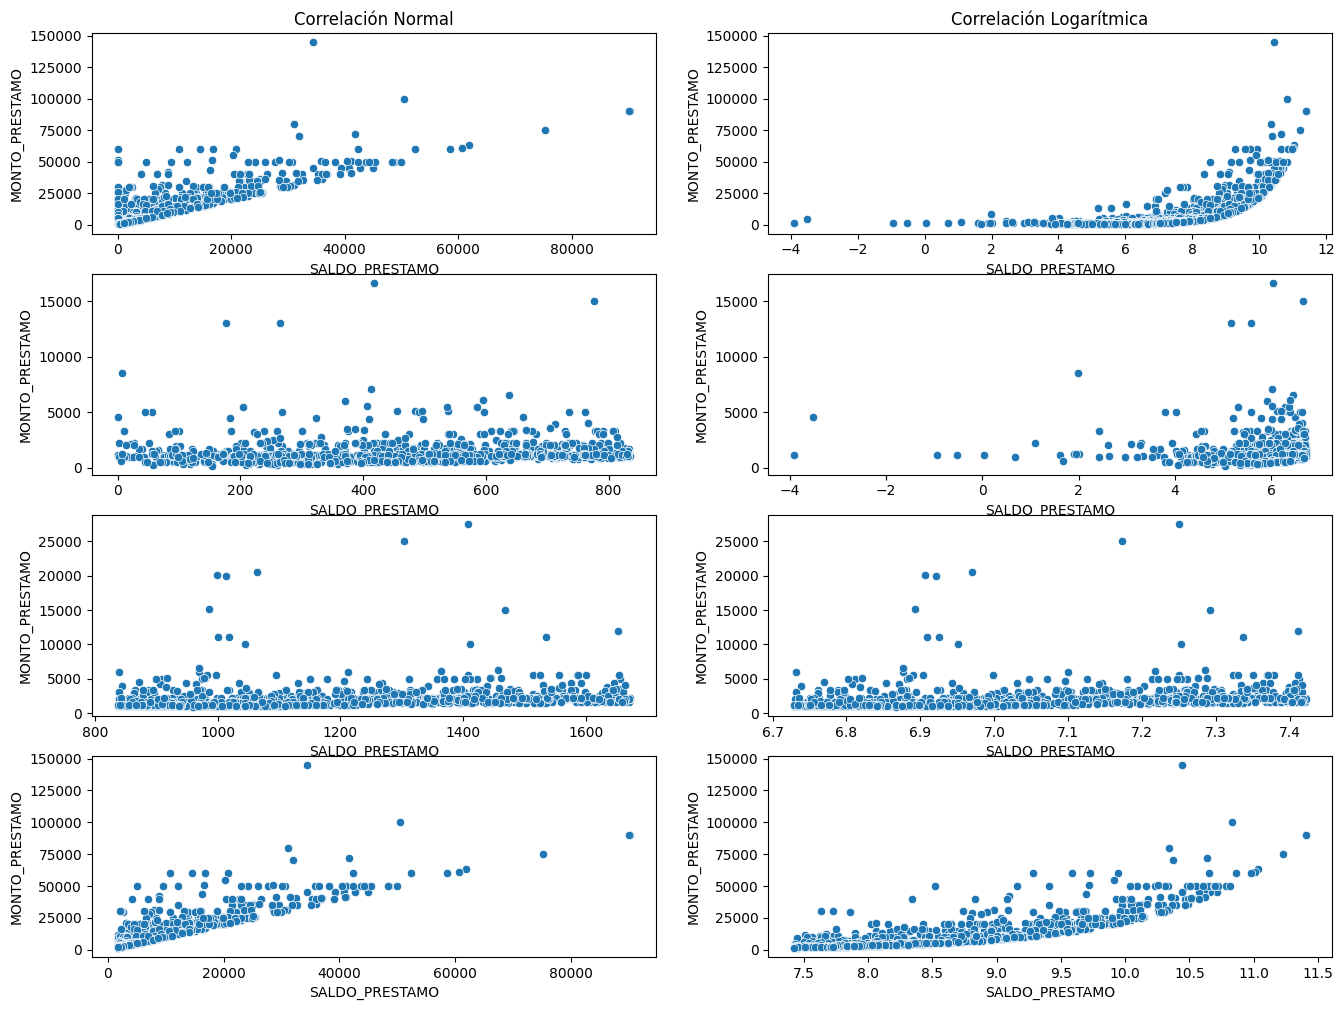

In [51]:
f, axs = plt.subplots(4,2,figsize = (16,12))

sns.scatterplot(data=n_data, x='SALDO_PRESTAMO', y='MONTO_PRESTAMO', ax=axs[0,0])
axs[0,0].set_title("Correlación Normal")
sns.scatterplot(data=n_data, x=np.log(n_data['SALDO_PRESTAMO']), y='MONTO_PRESTAMO', ax=axs[0,1])
axs[0,1].set_title("Correlación Logarítmica")

sns.scatterplot(data=q1, x='SALDO_PRESTAMO', y='MONTO_PRESTAMO', ax=axs[1,0])
sns.scatterplot(data=q1, x=np.log(q1['SALDO_PRESTAMO']), y='MONTO_PRESTAMO', ax=axs[1,1])


sns.scatterplot(data=q2, x='SALDO_PRESTAMO', y='MONTO_PRESTAMO', ax=axs[2,0])
sns.scatterplot(data=q2, x=np.log(q2['SALDO_PRESTAMO']), y='MONTO_PRESTAMO', ax=axs[2,1])

sns.scatterplot(data=q3, x='SALDO_PRESTAMO', y='MONTO_PRESTAMO', ax=axs[3,0])
sns.scatterplot(data=q3, x=np.log(q3['SALDO_PRESTAMO']), y='MONTO_PRESTAMO', ax=axs[3,1])



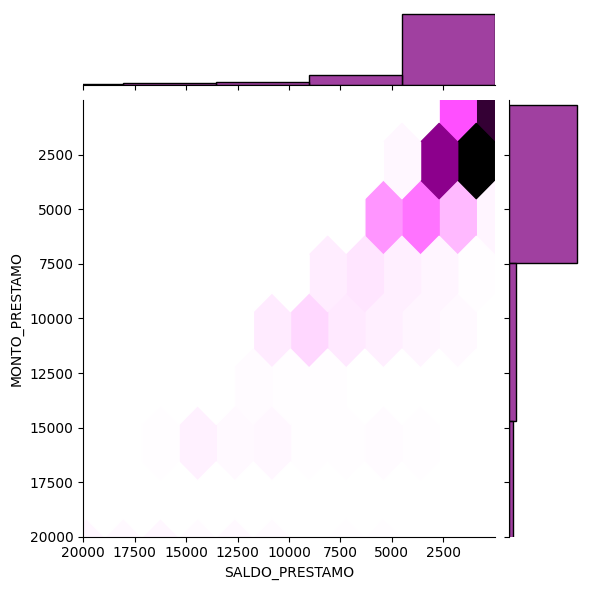

In [52]:
# Mapa hexagonal sobre el dataframe filtrado
ax = sns.jointplot(x=data_3['SALDO_PRESTAMO'], y=data_3['MONTO_PRESTAMO'], 
                   kind="hex", color="purple", xlim=20000,ylim=20000,
                   marginal_kws=dict(bins=20)
                  )

(0.0, 30000.0)

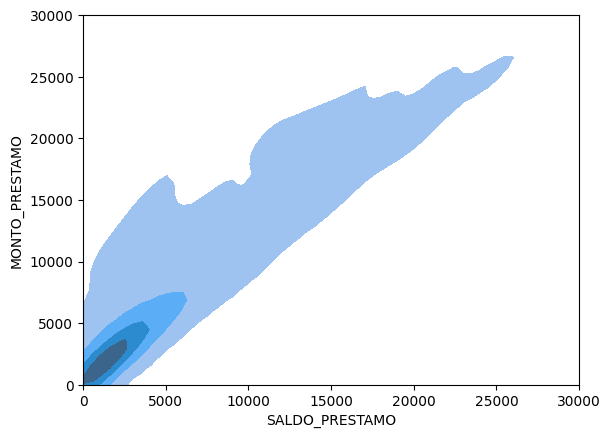

In [53]:
ax = sns.kdeplot(x=data_3['SALDO_PRESTAMO'], y=data_3['MONTO_PRESTAMO'], fill=True, levels = 5)
ax.set_ylim(0,30000)
ax.set_xlim(0,30000)

### CUOTAS FALTANTES VIGENTES X CUOTAS ATRASADAS

In [54]:
data_4 = n_data.query('CUO_FALTANTES_VIGENTES > 0')
q1,q2,q3 = cuartil(data_4, 'CUO_FALTANTES_VIGENTES')

In [55]:
data_4['CUO_FALTANTES_VIGENTES'].corr(data_4['NCUO_ATRASADAS'],method="spearman")

0.2160091397258558

In [56]:
data_4.nunique()

TEA_INTERES                571
CUOTA_FIJA                4227
EDAD                        61
NCUO_ATRASADAS              81
CUO_FALTANTES_VIGENTES     144
NDIAS_ATRASADOS            441
MONTO_PRESTAMO             810
SALDO_PRESTAMO            4371
dtype: int64

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='CUO_FALTANTES_VIGENTES', ylabel='NCUO_ATRASADAS'>

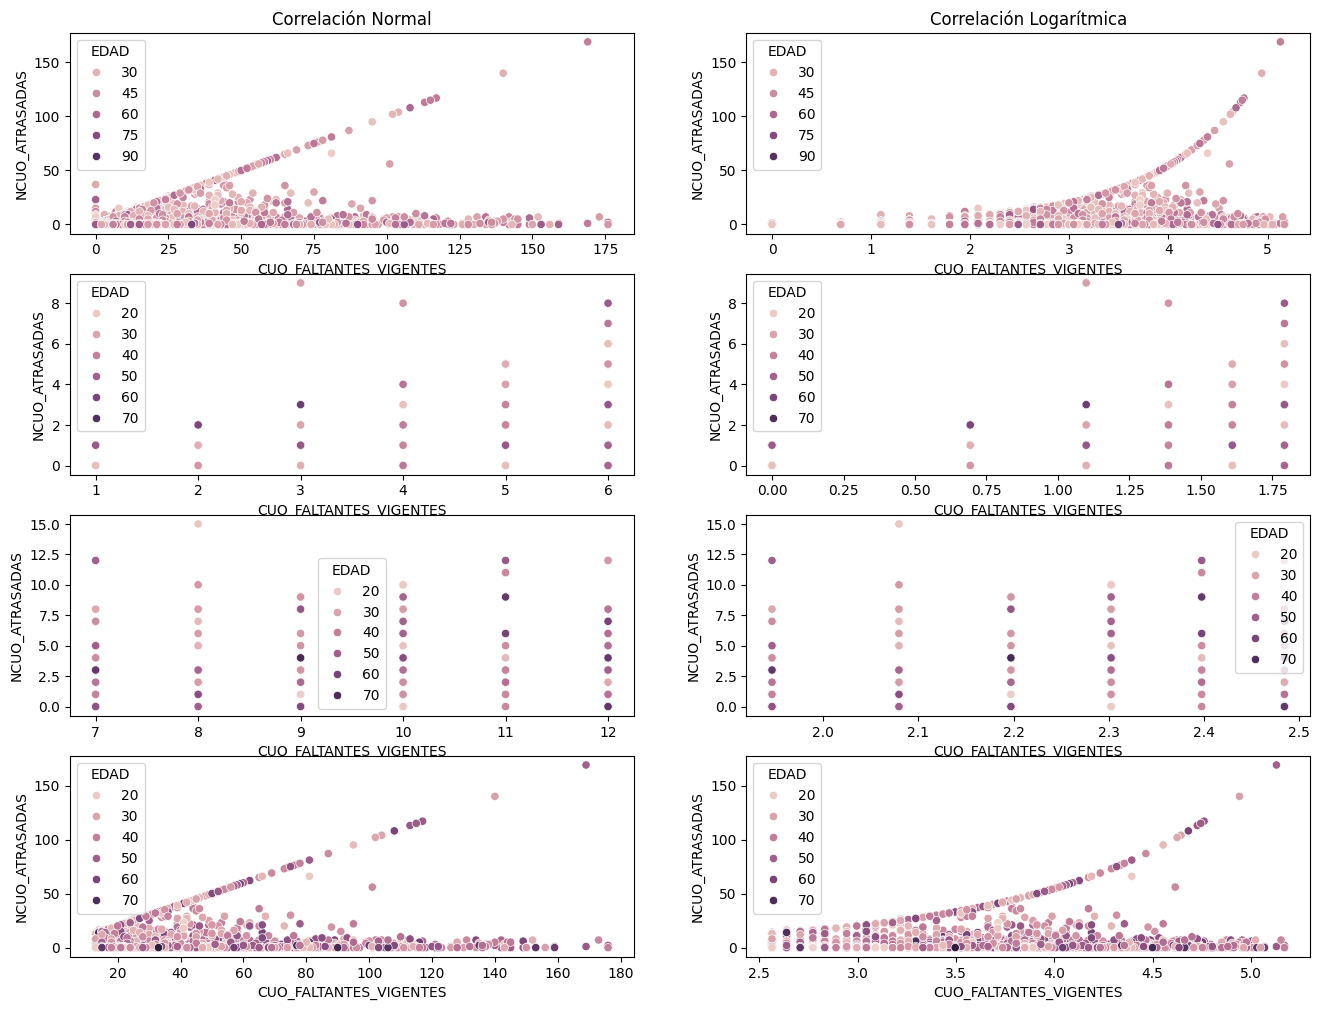

In [57]:
f, axs = plt.subplots(4,2,figsize = (16,12))
sns.scatterplot(data=n_data, x='CUO_FALTANTES_VIGENTES', y='NCUO_ATRASADAS', ax=axs[0,0], hue='EDAD')
axs[0,0].set_title("Correlación Normal")
sns.scatterplot(data=n_data, x=np.log(n_data['CUO_FALTANTES_VIGENTES']), y='NCUO_ATRASADAS', ax=axs[0,1], hue='EDAD')
axs[0,1].set_title("Correlación Logarítmica")

sns.scatterplot(data=q1, x='CUO_FALTANTES_VIGENTES', y='NCUO_ATRASADAS', ax=axs[1,0], hue='EDAD')
sns.scatterplot(data=q1, x=np.log(q1['CUO_FALTANTES_VIGENTES']), y='NCUO_ATRASADAS', ax=axs[1,1], hue='EDAD')

sns.scatterplot(data=q2, x='CUO_FALTANTES_VIGENTES', y='NCUO_ATRASADAS', ax=axs[2,0], hue='EDAD')
sns.scatterplot(data=q2, x=np.log(q2['CUO_FALTANTES_VIGENTES']), y='NCUO_ATRASADAS', ax=axs[2,1], hue='EDAD')

sns.scatterplot(data=q3, x='CUO_FALTANTES_VIGENTES', y='NCUO_ATRASADAS', ax=axs[3,0], hue='EDAD')
sns.scatterplot(data=q3, x=np.log(q3['CUO_FALTANTES_VIGENTES']), y='NCUO_ATRASADAS', ax=axs[3,1], hue='EDAD')

(-5.0, 150.0)

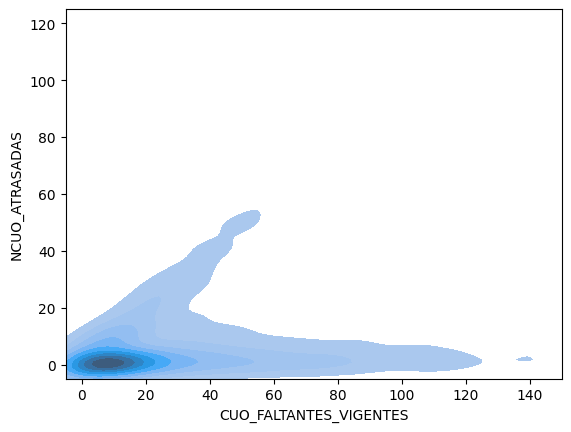

In [58]:
ax = sns.kdeplot(x=data_4['CUO_FALTANTES_VIGENTES'], y=data_4['NCUO_ATRASADAS'], fill=True)
ax.set_ylim(-5,125)
ax.set_xlim(-5,150)

### EDAD X SALDO PRESTADO

In [59]:
n_data['EDAD'].corr(n_data['MONTO_PRESTAMO'])

0.03019827701821323

In [60]:
q1,q2,q3 = cuartil(n_data, 'EDAD')

<Axes: xlabel='EDAD', ylabel='MONTO_PRESTAMO'>

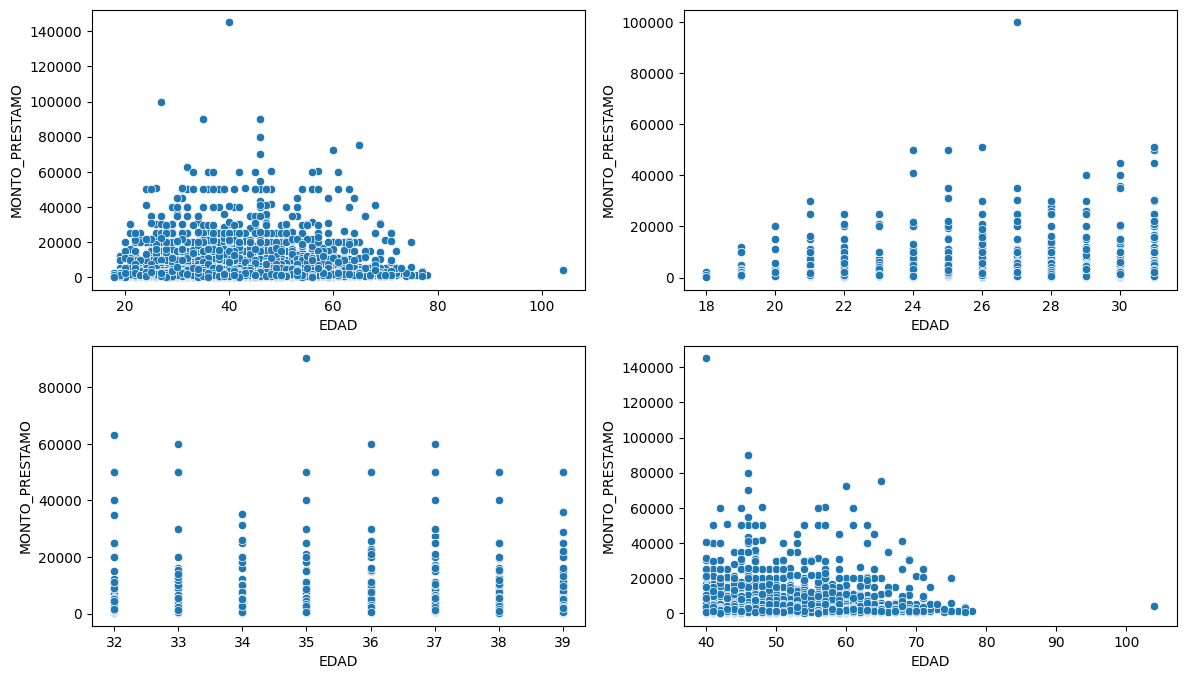

In [61]:
fig, axs = plt.subplots(2,2, figsize=(14,8))
sns.scatterplot(data=n_data, x='EDAD', y='MONTO_PRESTAMO', ax=axs[0,0])
sns.scatterplot(data=q1, x='EDAD', y='MONTO_PRESTAMO', ax= axs[0,1])
sns.scatterplot(data=q2, x='EDAD', y='MONTO_PRESTAMO', ax= axs[1,0])
sns.scatterplot(data=q3, x='EDAD', y='MONTO_PRESTAMO', ax=axs[1,1])

In [62]:
n_data['EDAD'].corr(np.log(n_data['MONTO_PRESTAMO']))


0.042400974099069684

<Axes: xlabel='EDAD', ylabel='MONTO_PRESTAMO'>

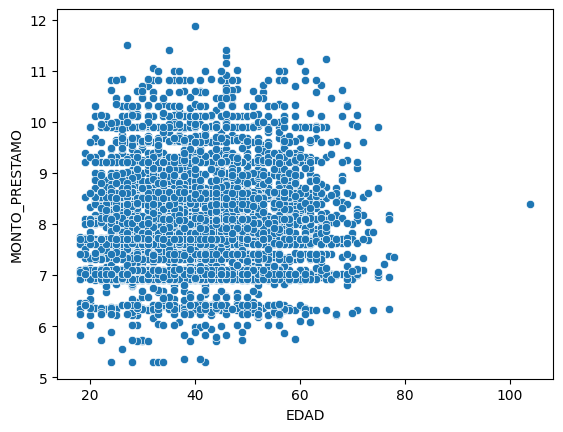

In [63]:
sns.scatterplot(data=n_data, x='EDAD', y = np.log(data['MONTO_PRESTAMO']) )

## DATOS SEMANALES

In [64]:
data_Frec2= data.query('NOM_FRECUENCIA == "SEMANAS"')

In [65]:
data_Frec2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, 1 to 9684
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SOCIO                   1392 non-null   object 
 1   CUENTA                  1392 non-null   int64  
 2   AGENCIA                 1392 non-null   int64  
 3   TIPO_SOCIO              1392 non-null   int64  
 4   MONEDA                  1392 non-null   object 
 5   PAGARE                  1392 non-null   object 
 6   PRODUCTO                1392 non-null   object 
 7   FEC_ULT_PAGO            1392 non-null   object 
 8   TEA_INTERES             1392 non-null   float64
 9   CUOTA_FIJA              1392 non-null   float64
 10  DIAS                    1392 non-null   int64  
 11  NOM_FRECUENCIA          1392 non-null   object 
 12  EDAD                    1392 non-null   int64  
 13  ESTADO_CIVIL            1392 non-null   object 
 14  SEXO                    1392 non-null   objec

In [66]:
# pd.set_option('display.max_columns', None)
data_no_repro2 = data_Frec2.query('NRO_REPRO.isna()')

In [67]:
data_no_repro.sample(7)

SOCIO  CUENTA  AGENCIA  TIPO_SOCIO  \
5156                  BERROCAL MORA, VIOLETA   26307        3           1   
4573  LLUFIRE LLACTAHUAMANI, SATURNINA NORMA   23967        2           1   
210               SILVA LACHIRA, YIMY YECSON   24631        1           1   
7059             CAYLLAHUA LOPEZ, EXALTACION   26618        5           1   
9553                    MAMANI GONZALO, ROSA   20375        8           1   
4745                      FLORES VERA, NERIO   20627        3           1   
1604                SALAZAR SARAVIA, RICARDO    3599        1           1   

     MONEDA          PAGARE               PRODUCTO FEC_ULT_PAGO  TEA_INTERES  \
5156      S  03-0010468-24           MAS INCLUSIVO   2024-04-30       210.44   
4573      S  02-009735-24    MAS INCLUSIVO SEMANAL   2024-04-30       200.09   
210       S  01-000754-24            SEMANAL MICRO   2024-04-03       151.82   
7059      S  05-0005239-24          CONSUMO FORMAL   2024-04-20        80.00   
9553      S  08-0000080-24        PAGA DIARIO (CT)   2024-04-30       181.27   
4745      S  03-0001612-23            RAPIDIN (CT)   2024-04-30        42.58   
1604      S  01-0026328-24        GARANTIA LIQUIDA   2024-04-23       100.08   

      CUOTA_FIJA  DIAS NOM_FRECUENCIA  EDAD ESTADO_CIVIL SEXO TIPO_VIVIENDA  \
5156       23.49     1          DIAS     31  Soltero (a)    F     ALQUILADA   
4573      311.71     7        SEMANAS    39  Soltero (a)    F     ALQUILADA   
210       395.21     7        SEMANAS    40  Soltero (a)    M      FAMILIAR   
7059      483.84    30          MESES    38   Casado (a)    M      FAMILIAR   
9553       97.72     1          DIAS     53  Soltero (a)    F      FAMILIAR   
4745      487.25    30          MESES    53  Soltero (a)    M     ALQUILADA   
1604      473.91    30          MESES    40  Soltero (a)    M      FAMILIAR   

          OTORGA RIESGO_INDIVIDUAL  NCUO_ATRASADAS  CUO_FALTANTES_VIGENTES  \
5156  2024-01-18            NORMAL               0                       0   
4573  2024-02-29            NORMAL               0                      12   
210   2024-01-09            NORMAL               0                       0   
7059  2024-03-21            NORMAL               0                      17   
9553  2024-04-01            NORMAL               7                      32   
4745  2023-05-23            NORMAL               1                       8   
1604  2024-02-20            NORMAL               0                       0   

      NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  NRO_REPRO  \
5156                0          1650.0            0.00        NaN   
4573                0          5000.0         3262.34        NaN   
210                 0          4225.0            0.00        NaN   
7059                0          5590.0         5389.86        NaN   
9553                0          4415.0         3249.09        NaN   
4745                1          6600.0         3404.53        NaN   
1604                0          5090.0            0.00        NaN   

                            ANA_ORIGEN                        ANA_ACTUAL  \
5156             QUISPE CHECCA, KARINA             QUISPE CHECCA, KARINA   
4573                TUNQUI SUCA, ERIKA                TUNQUI SUCA, ERIKA   
210   BERNARDO CRISPIN, LUCIA MILAGROS  BERNARDO CRISPIN, LUCIA MILAGROS   
7059           ROJAS AUCCACUSI, ROXANA           ROJAS AUCCACUSI, ROXANA   
9553      AGUILAR CABALLERO, KAY SMITH      AGUILAR CABALLERO, KAY SMITH   
4745            CASTILLA BUENO, WILMER            CASTILLA BUENO, WILMER   
1604                QUISPE TACO, YOJAN            TTUPA HUALLA, ROSSMERY   

            PROFESION                 OCUPACION  \
5156      Comerciante               RESTAURANTE   
4573  No Especificada        VENTA DE ABARROTES   
210            Sastre        DATRERIA DE TRAJES   
7059  No Especificada  SUB OFICIAL DEL EJERCITO   
9553      Comerciante        VENTA DE ABARROTES   
4745          Albañil                   ALBAÑIL   
1604        

In [68]:
n_data2 = data_no_repro.select_dtypes(include=[np.number])

In [69]:
n_data2 = n_data2.drop(['CUENTA', 'AGENCIA', 'TIPO_SOCIO', 'DIAS'], axis=1)

In [70]:
n_data2.drop('NRO_REPRO',axis=1,inplace=True)

In [71]:
n_data2.describe()

TEA_INTERES    CUOTA_FIJA         EDAD  NCUO_ATRASADAS  \
count  5911.000000   5911.000000  5911.000000     5911.000000   
mean    138.684260    329.484613    40.499070        3.295043   
std      98.823549    591.384425    11.899194        9.300760   
min       0.000000      7.610000    18.000000        0.000000   
25%      67.460000     41.465000    31.000000        0.000000   
50%     100.080000    153.800000    39.000000        0.000000   
75%     200.090000    365.990000    49.000000        2.000000   
max     500.000000  11106.870000   104.000000      169.000000   

       CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  
count             5911.000000      5911.000000     5911.000000     5911.000000  
mean                17.491795        84.758078     4964.547119     3039.119110  
std                 24.317003       269.608238     7892.256047     5695.614171  
min                  0.000000         0.000000      200.000000        0.000000  
25%                  3.000000         0.000000     1135.000000      477.050000  
50%                  9.000000         0.000000     2225.000000     1234.330000  
75%                 21.000000         0.000000     5060.000000     3051.155000  
max                176.000000      2187.000000   145000.000000    90240.000000

In [72]:
n_data2.corr(method="spearman")

TEA_INTERES  CUOTA_FIJA      EDAD  NCUO_ATRASADAS  \
TEA_INTERES                1.000000   -0.685112  0.029854        0.140272   
CUOTA_FIJA                -0.685112    1.000000 -0.026801       -0.267906   
EDAD                       0.029854   -0.026801  1.000000       -0.019692   
NCUO_ATRASADAS             0.140272   -0.267906 -0.019692        1.000000   
CUO_FALTANTES_VIGENTES     0.136284   -0.205698  0.006258        0.358843   
NDIAS_ATRASADOS           -0.126627    0.042886 -0.058123        0.688282   
MONTO_PRESTAMO            -0.526428    0.692722  0.042512       -0.122327   
SALDO_PRESTAMO            -0.382697    0.548684 -0.002873        0.058101   

                        CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  \
TEA_INTERES                           0.136284        -0.126627   
CUOTA_FIJA                           -0.205698         0.042886   
EDAD                                  0.006258        -0.058123   
NCUO_ATRASADAS                        0.358843         0.688282   
CUO_FALTANTES_VIGENTES                1.000000         0.043595   
NDIAS_ATRASADOS                       0.043595         1.000000   
MONTO_PRESTAMO                        0.145946        -0.080227   
SALDO_PRESTAMO                        0.579619         0.029384   

                        MONTO_PRESTAMO  SALDO_PRESTAMO  
TEA_INTERES                  -0.526428       -0.382697  
CUOTA_FIJA                    0.692722        0.548684  
EDAD                          0.042512       -0.002873  
NCUO_ATRASADAS               -0.122327        0.058101  
CUO_FALTANTES_VIGENTES        0.145946        0.579619  
NDIAS_ATRASADOS              -0.080227        0.029384  
MONTO_PRESTAMO                1.000000        0.679980  
SALDO_PRESTAMO                0.679980        1.000000

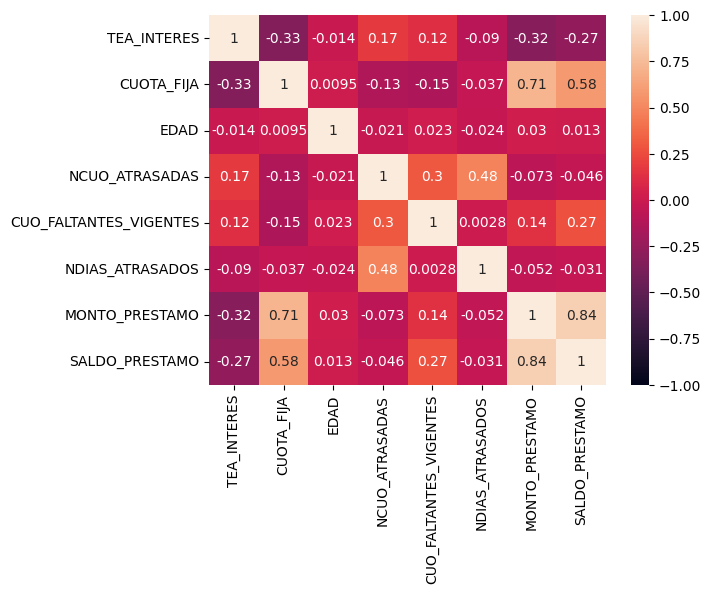

In [73]:
ax = sns.heatmap(n_data2.corr(), vmin=-1, vmax=1, annot=True);

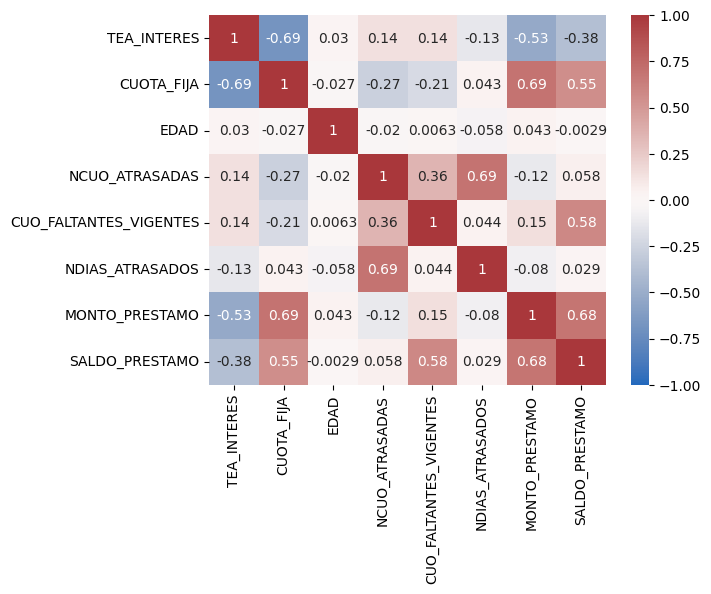

In [74]:
ax = sns.heatmap(n_data2.corr(method="spearman"), vmin=-1, vmax=1, cmap="vlag", annot=True);

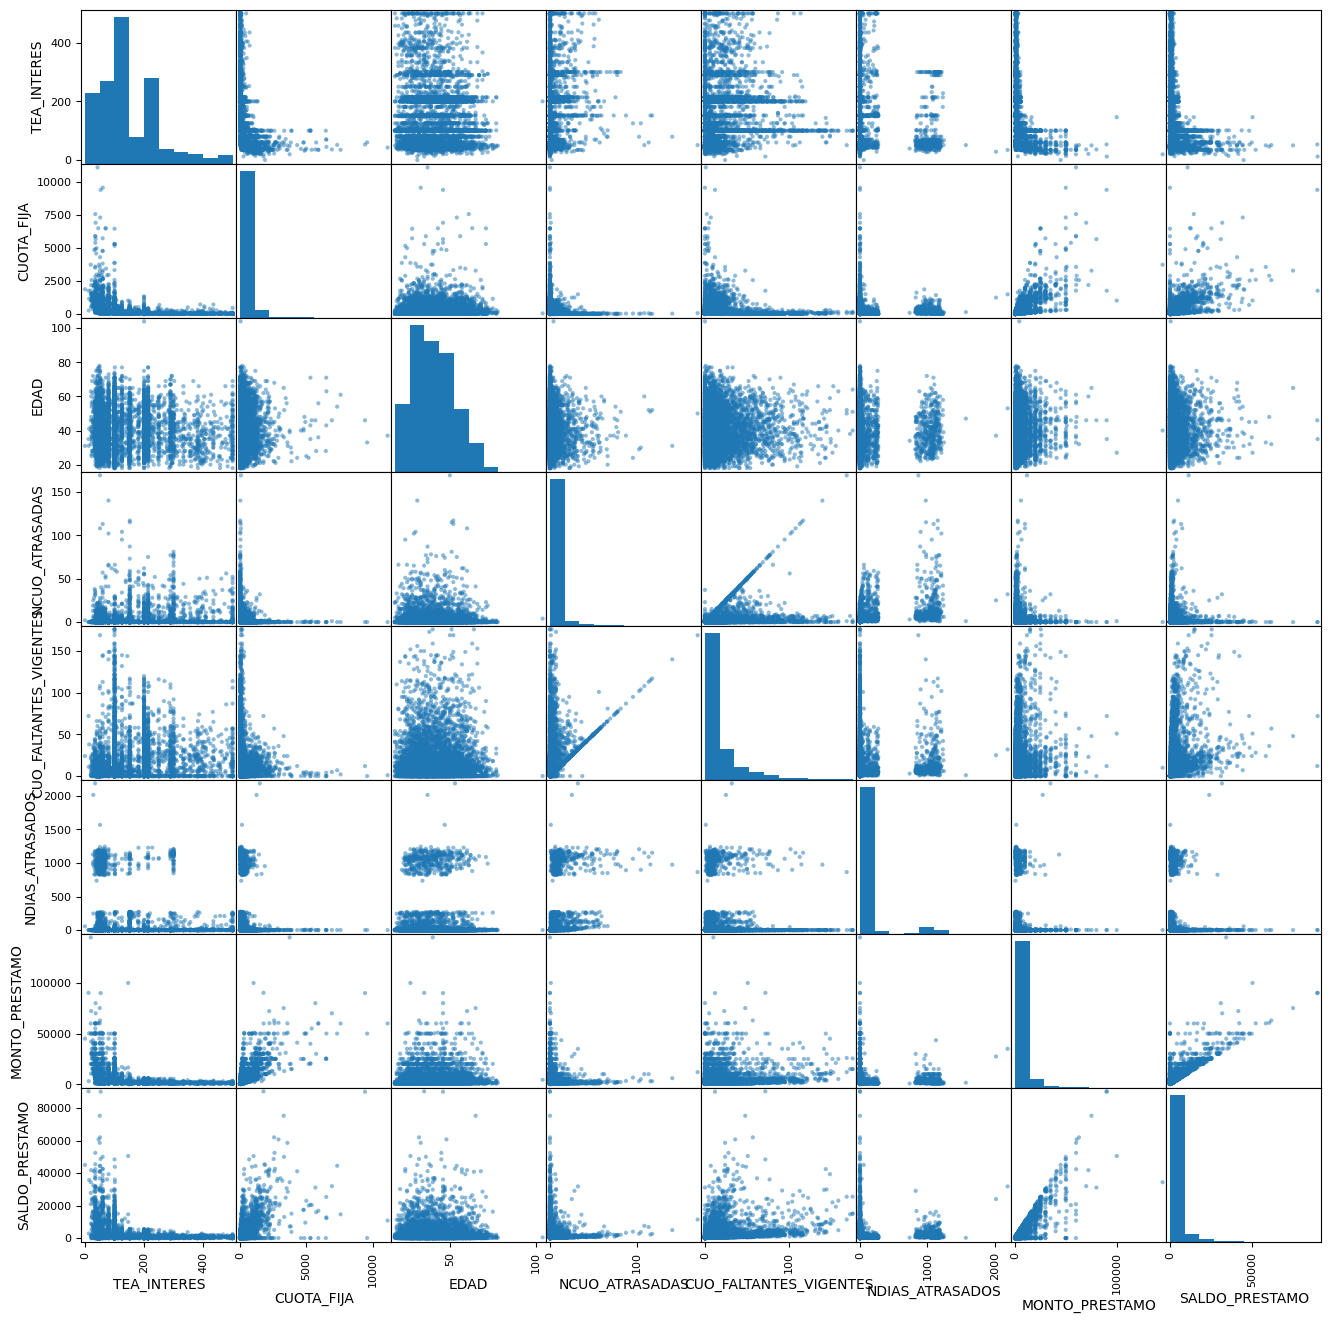

In [75]:
pd.plotting.scatter_matrix(n_data2, figsize=(16,16),diagonal ="hist");

### TEA interes x CUOTA FIJA

In [76]:
n_data2.TEA_INTERES.corr(n_data.CUOTA_FIJA, method="spearman")

-0.6851115776779614

<Axes: xlabel='CUOTA_FIJA', ylabel='TEA_INTERES'>

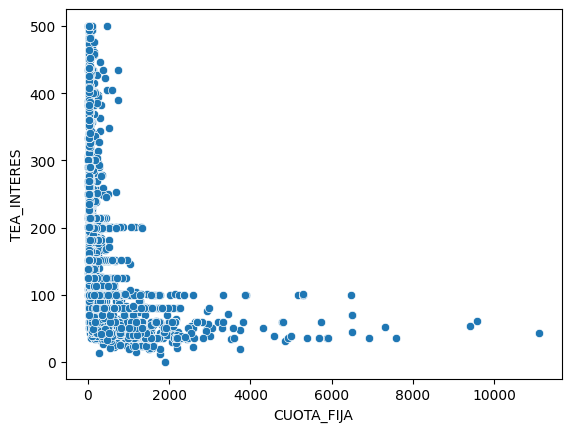

In [77]:
sns.scatterplot(data=n_data2, x='CUOTA_FIJA', y= 'TEA_INTERES')

In [78]:
Q1, Q2, Q3 = cuartil(n_data2,'TEA_INTERES')

In [79]:
fig, axs = plt.subplots(2,2, figsize = (16,8))
sns.scatterplot(data=n_data2, x='CUOTA_FIJA', y = 'TEA_INTERES', ax= axs[0, 0])
sns.scatterplot(data = Q1, x = 'CUOTA_FIJA', y = 'TEA_INTERES', ax = axs[0, 1])
sns.scatterplot(data = Q2, x = 'CUOTA_FIJA', y = 'TEA_INTERES', ax = axs[1, 0])
sns.scatterplot(data = Q3, x = 'CUOTA_FIJA', y = 'TEA_INTERES', ax = axs[1, 1])

<Axes: xlabel='CUOTA_FIJA', ylabel='TEA_INTERES'>

<Axes: xlabel='CUOTA_FIJA', ylabel='TEA_INTERES'>

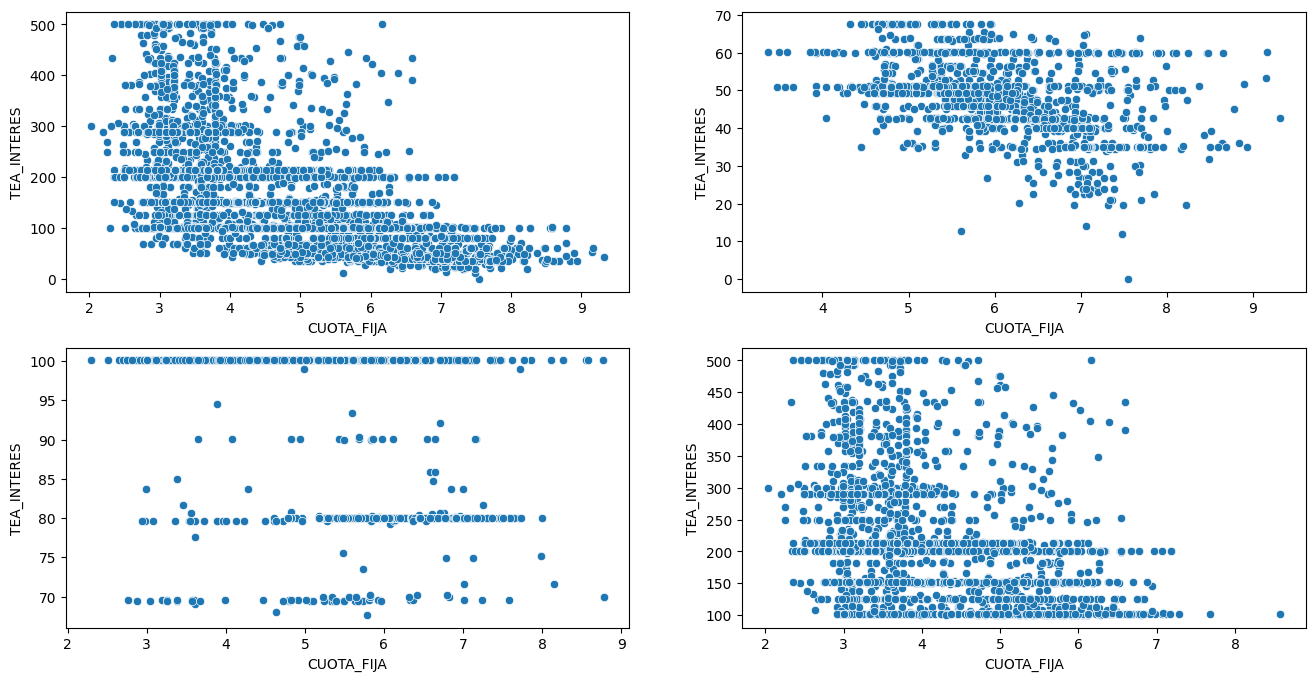

In [80]:
fig, axs = plt.subplots(2,2, figsize = (16,8))
sns.scatterplot(data=n_data2, x= np.log(n_data2['CUOTA_FIJA']), y = 'TEA_INTERES', ax= axs[0, 0])
sns.scatterplot(data = Q1, x = np.log(n_data2['CUOTA_FIJA']), y = 'TEA_INTERES', ax = axs[0, 1])
sns.scatterplot(data = Q2, x = np.log(n_data2['CUOTA_FIJA']), y = 'TEA_INTERES', ax = axs[1, 0])
sns.scatterplot(data = Q3, x = np.log(n_data2['CUOTA_FIJA']), y = 'TEA_INTERES', ax = axs[1, 1])

### MONTO X CUOTA_FIJA

In [81]:
n_data2.MONTO_PRESTAMO.corr(n_data.CUOTA_FIJA, method="pearson")

0.7136230926044993

In [82]:
Q1, Q2, Q3 = cuartil(n_data2,'CUOTA_FIJA')

<Axes: xlabel='CUOTA_FIJA', ylabel='MONTO_PRESTAMO'>

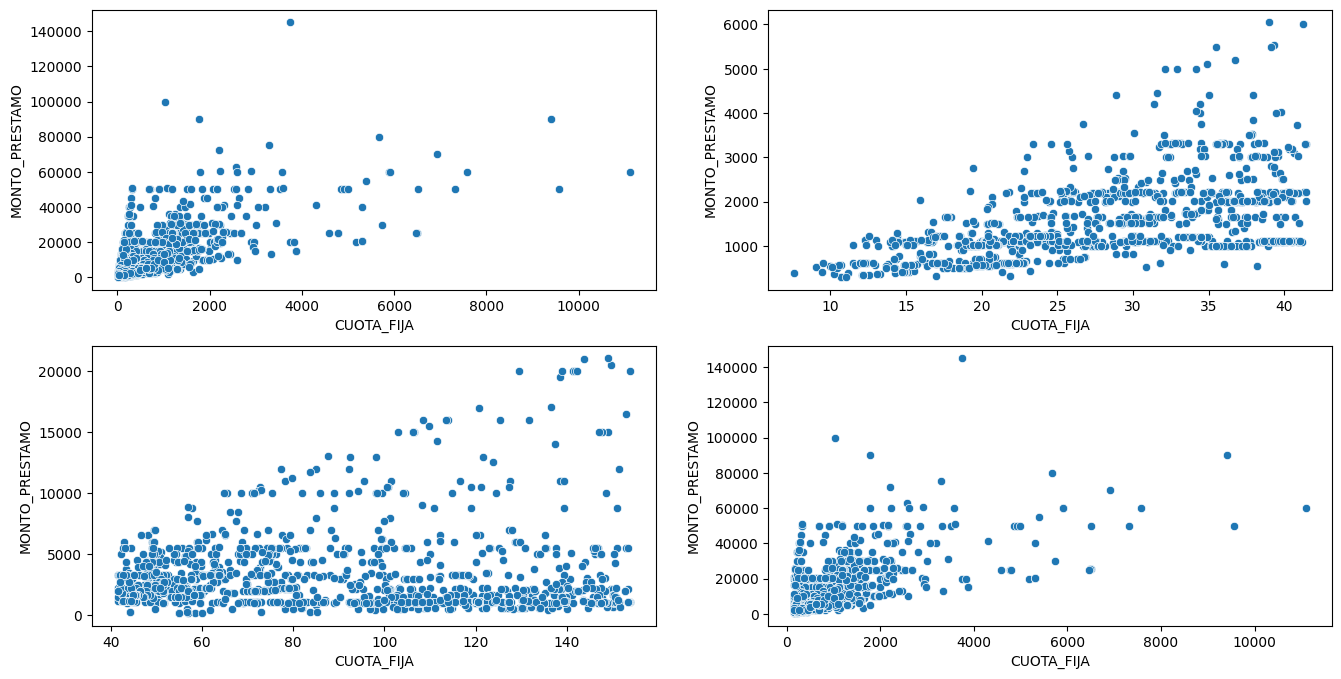

In [83]:
fig, axs = plt.subplots(2,2, figsize = (16,8))
sns.scatterplot(data=n_data2, x='CUOTA_FIJA', y = 'MONTO_PRESTAMO', ax= axs[0, 0])
sns.scatterplot(data = Q1, x = 'CUOTA_FIJA', y = 'MONTO_PRESTAMO', ax = axs[0, 1])
sns.scatterplot(data = Q2, x = 'CUOTA_FIJA', y = 'MONTO_PRESTAMO', ax = axs[1, 0])
sns.scatterplot(data = Q3, x = 'CUOTA_FIJA', y = 'MONTO_PRESTAMO', ax = axs[1, 1])

<Axes: xlabel='CUOTA_FIJA', ylabel='MONTO_PRESTAMO'>

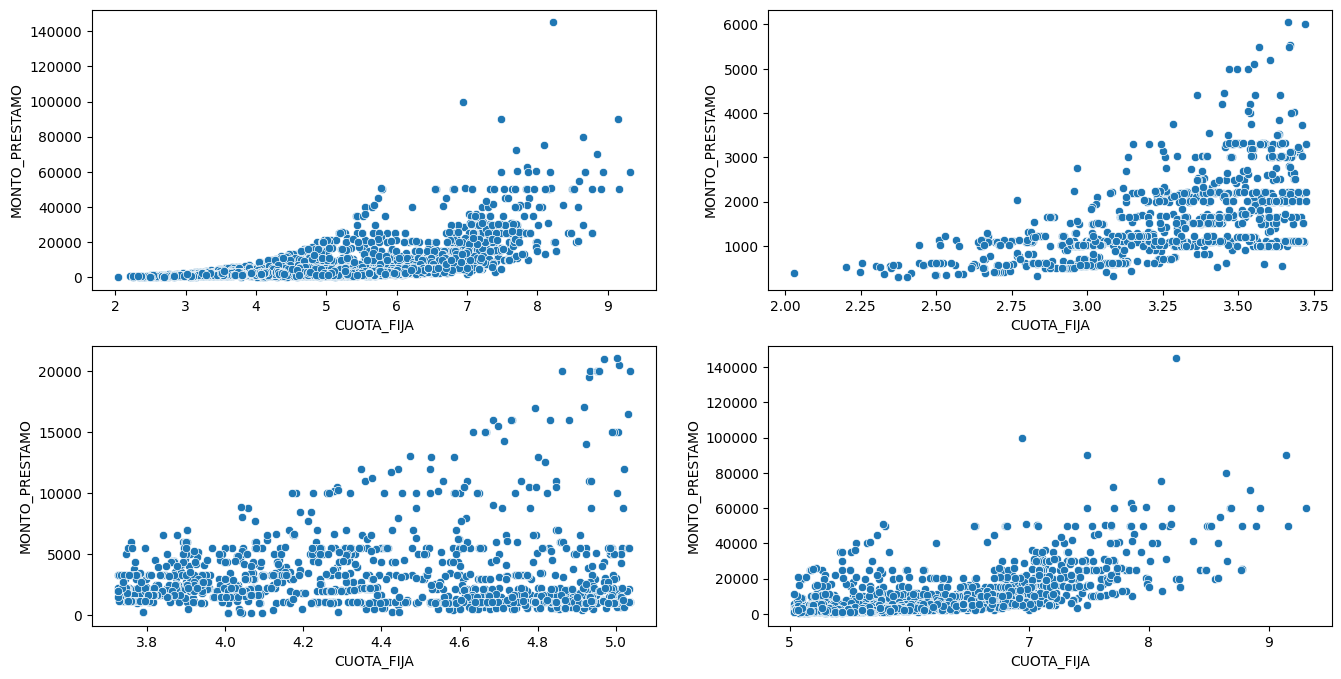

In [84]:
fig, axs = plt.subplots(2,2, figsize = (16,8))
sns.scatterplot(data=n_data2, x= np.log(n_data2['CUOTA_FIJA']), y = 'MONTO_PRESTAMO', ax= axs[0, 0])
sns.scatterplot(data = Q1, x = np.log(n_data2['CUOTA_FIJA']), y = 'MONTO_PRESTAMO', ax = axs[0, 1])
sns.scatterplot(data = Q2, x = np.log(n_data2['CUOTA_FIJA']), y = 'MONTO_PRESTAMO', ax = axs[1, 0])
sns.scatterplot(data = Q3, x = np.log(n_data2['CUOTA_FIJA']), y = 'MONTO_PRESTAMO', ax = axs[1, 1])

### CUOTAS FALTANTES x MONTO PRESTAMO

In [85]:
n_data2.MONTO_PRESTAMO.corr(n_data.CUO_FALTANTES_VIGENTES, method="spearman")

0.14594622455612985

<Axes: xlabel='CUOTA_FIJA', ylabel='CUO_FALTANTES_VIGENTES'>

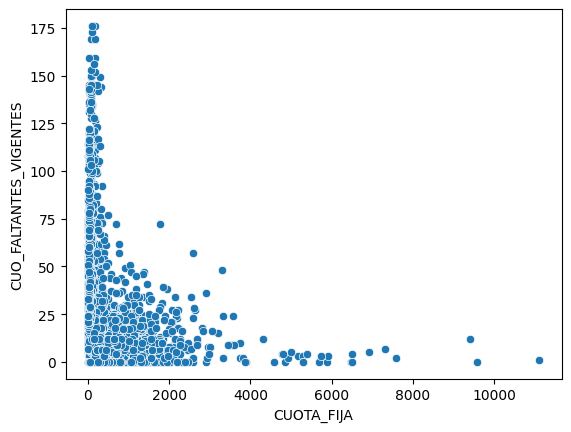

In [86]:
sns.scatterplot(data=n_data2, x='CUOTA_FIJA', y = 'CUO_FALTANTES_VIGENTES')

### CUOTAS FALTANTES VIGENTES x EDAD

In [87]:
Q1, Q2, Q3 = cuartil(n_data2,'CUO_FALTANTES_VIGENTES')

<Axes: xlabel='CUO_FALTANTES_VIGENTES', ylabel='EDAD'>

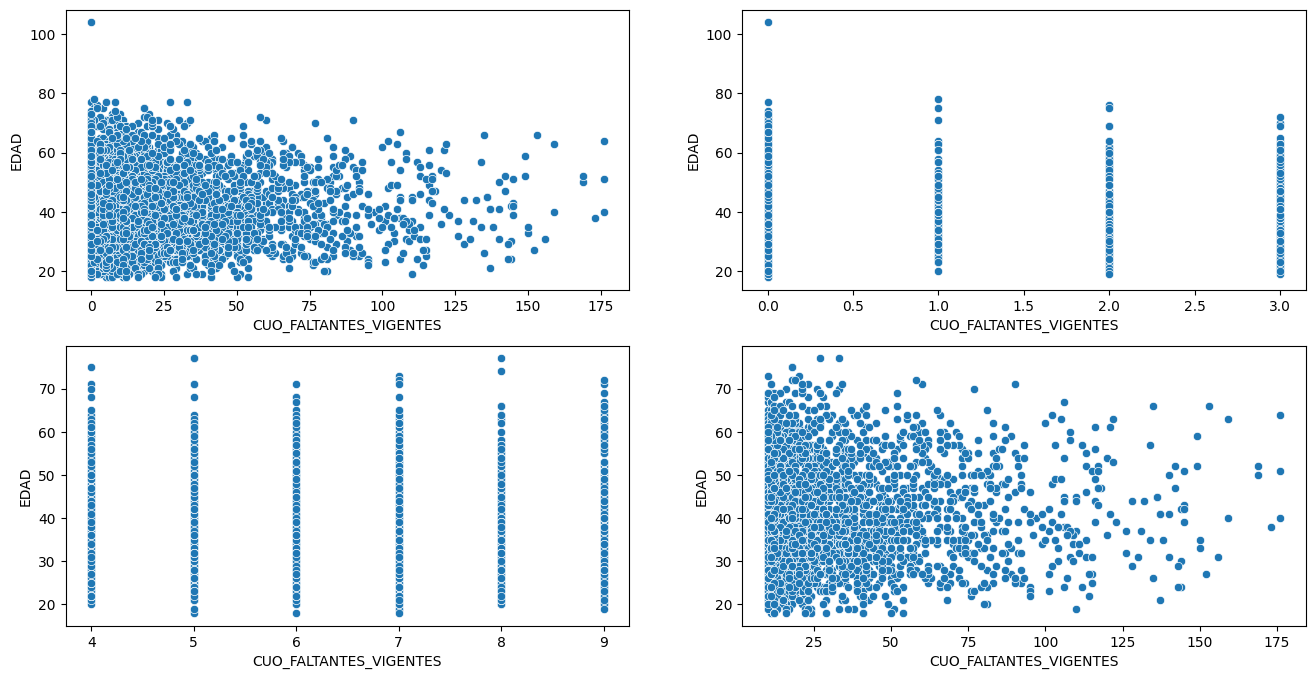

In [88]:
fig, axs = plt.subplots(2,2, figsize = (16,8))
sns.scatterplot(data=n_data2, x='CUO_FALTANTES_VIGENTES', y = 'EDAD', ax= axs[0, 0])
sns.scatterplot(data = Q1, x = 'CUO_FALTANTES_VIGENTES', y = 'EDAD', ax = axs[0, 1])
sns.scatterplot(data = Q2, x = 'CUO_FALTANTES_VIGENTES', y = 'EDAD', ax = axs[1, 0])
sns.scatterplot(data = Q3, x = 'CUO_FALTANTES_VIGENTES', y = 'EDAD', ax = axs[1, 1])

<Axes: xlabel='CUO_FALTANTES_VIGENTES', ylabel='EDAD'>

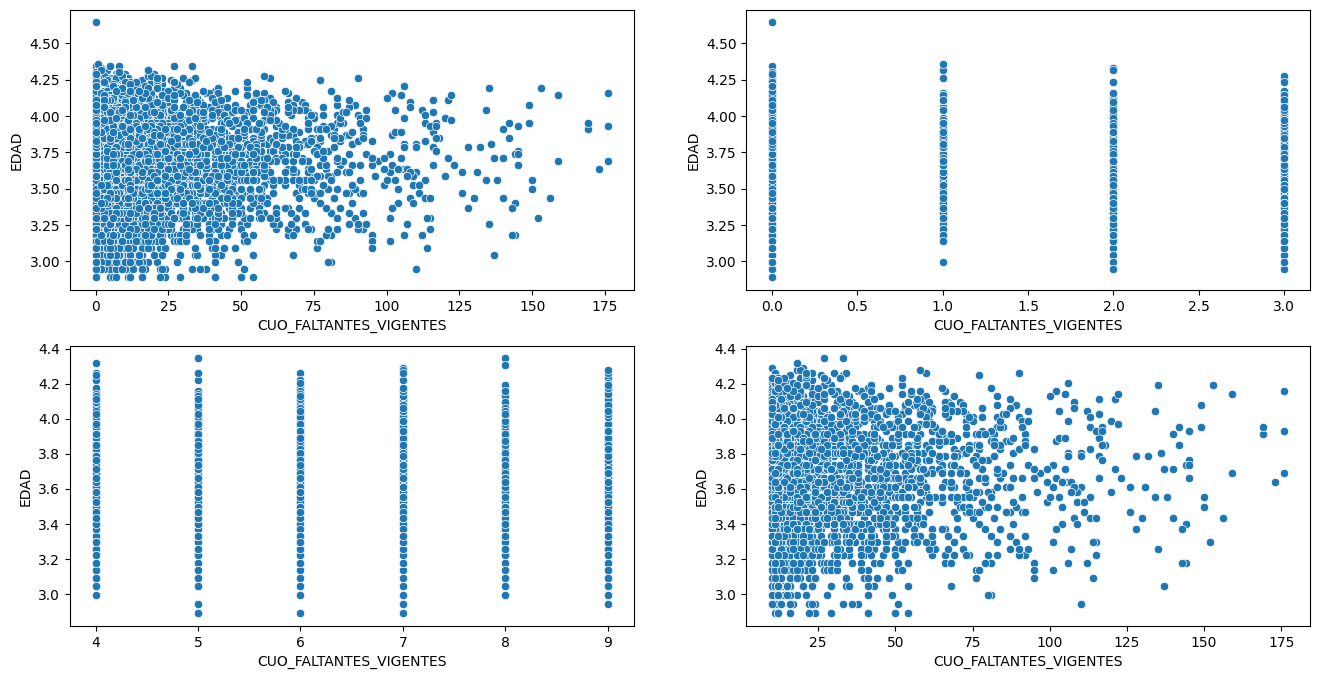

In [89]:
fig, axs = plt.subplots(2,2, figsize = (16,8))
sns.scatterplot(data=n_data2, x= 'CUO_FALTANTES_VIGENTES', y = np.log(n_data2['EDAD']), ax= axs[0, 0])
sns.scatterplot(data = Q1, x = 'CUO_FALTANTES_VIGENTES', y = np.log(n_data2['EDAD']), ax = axs[0, 1])
sns.scatterplot(data = Q2, x = 'CUO_FALTANTES_VIGENTES', y = np.log(n_data2['EDAD']), ax = axs[1, 0])
sns.scatterplot(data = Q3, x = 'CUO_FALTANTES_VIGENTES', y = np.log(n_data2['EDAD']), ax = axs[1, 1])

## DATOS QUINCENALES

In [90]:
data_Frec1= data.query('NOM_FRECUENCIA == "QUINCENAS"')

In [91]:
data_Frec1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 399 to 9716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SOCIO                   82 non-null     object 
 1   CUENTA                  82 non-null     int64  
 2   AGENCIA                 82 non-null     int64  
 3   TIPO_SOCIO              82 non-null     int64  
 4   MONEDA                  82 non-null     object 
 5   PAGARE                  82 non-null     object 
 6   PRODUCTO                82 non-null     object 
 7   FEC_ULT_PAGO            82 non-null     object 
 8   TEA_INTERES             82 non-null     float64
 9   CUOTA_FIJA              82 non-null     float64
 10  DIAS                    82 non-null     int64  
 11  NOM_FRECUENCIA          82 non-null     object 
 12  EDAD                    82 non-null     int64  
 13  ESTADO_CIVIL            82 non-null     object 
 14  SEXO                    82 non-null     objec

In [92]:
pd.set_option('display.max_columns', None)
data_no_repro3 = data_Frec1.query('NRO_REPRO.isna()')

In [93]:
n_data3 = data_no_repro3.select_dtypes(include=[np.number])

In [94]:
n_data3 = n_data3.drop(['CUENTA', 'AGENCIA', 'TIPO_SOCIO', 'DIAS','NRO_REPRO'], axis=1)

In [95]:
n_data3.describe()

TEA_INTERES  CUOTA_FIJA       EDAD  NCUO_ATRASADAS  \
count    52.000000   52.000000  52.000000       52.000000   
mean    109.303846  171.450000  37.269231        2.346154   
std      49.036493  157.975205  10.462099        4.329038   
min      42.910000   49.730000  22.000000        0.000000   
25%      54.205000   76.967500  29.000000        0.000000   
50%     149.870000  110.125000  35.500000        0.000000   
75%     149.870000  209.250000  42.000000        1.000000   
max     213.840000  833.990000  70.000000       19.000000   

       CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  
count               52.000000        52.000000       52.000000       52.000000  
mean                 5.269231       192.826923     1822.562308      784.040385  
std                  5.228562       409.726055     2023.374436      980.420933  
min                  0.000000         0.000000      200.000000        0.000000  
25%                  1.000000         0.000000      487.500000      153.340000  
50%                  4.000000         0.000000     1000.000000      400.835000  
75%                  8.500000        15.750000     2233.750000      942.920000  
max                 21.000000      1238.000000     8050.000000     4755.320000

In [96]:
n_data3.corr(method="spearman")

TEA_INTERES  CUOTA_FIJA      EDAD  NCUO_ATRASADAS  \
TEA_INTERES                1.000000   -0.544903 -0.275043       -0.338276   
CUOTA_FIJA                -0.544903    1.000000  0.242336        0.189647   
EDAD                      -0.275043    0.242336  1.000000        0.139538   
NCUO_ATRASADAS            -0.338276    0.189647  0.139538        1.000000   
CUO_FALTANTES_VIGENTES    -0.132684    0.068564 -0.012118        0.411144   
NDIAS_ATRASADOS           -0.374437    0.313395  0.163820        0.900327   
MONTO_PRESTAMO            -0.784525    0.879695  0.234172        0.224564   
SALDO_PRESTAMO            -0.306843    0.421727  0.054009        0.517037   

                        CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  \
TEA_INTERES                          -0.132684        -0.374437   
CUOTA_FIJA                            0.068564         0.313395   
EDAD                                 -0.012118         0.163820   
NCUO_ATRASADAS                        0.411144         0.900327   
CUO_FALTANTES_VIGENTES                1.000000         0.481061   
NDIAS_ATRASADOS                       0.481061         1.000000   
MONTO_PRESTAMO                        0.249413         0.350443   
SALDO_PRESTAMO                        0.863205         0.558322   

                        MONTO_PRESTAMO  SALDO_PRESTAMO  
TEA_INTERES                  -0.784525       -0.306843  
CUOTA_FIJA                    0.879695        0.421727  
EDAD                          0.234172        0.054009  
NCUO_ATRASADAS                0.224564        0.517037  
CUO_FALTANTES_VIGENTES        0.249413        0.863205  
NDIAS_ATRASADOS               0.350443        0.558322  
MONTO_PRESTAMO                1.000000        0.491661  
SALDO_PRESTAMO                0.491661        1.000000

<Axes: >

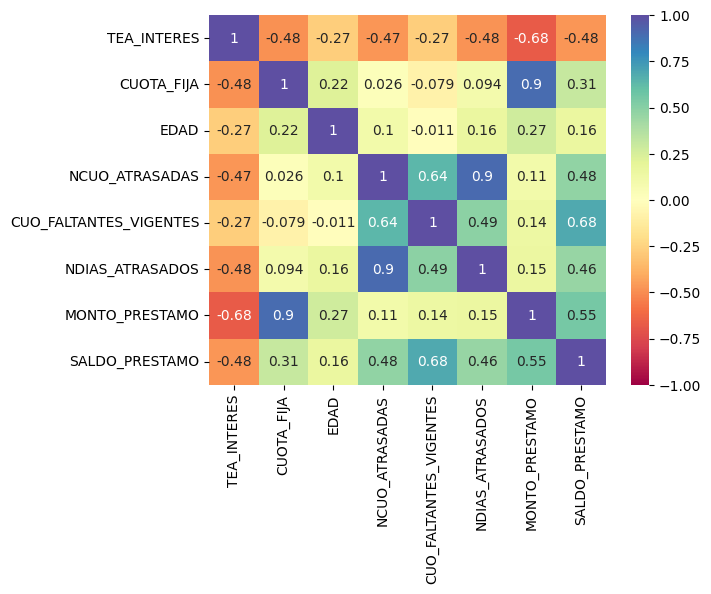

In [97]:
sns.heatmap(n_data3.corr(method="pearson"), vmin=-1, vmax=1, cmap="Spectral", annot=True)

Text(0.5, 1.0, 'Mapa de correlacion de Spearman')

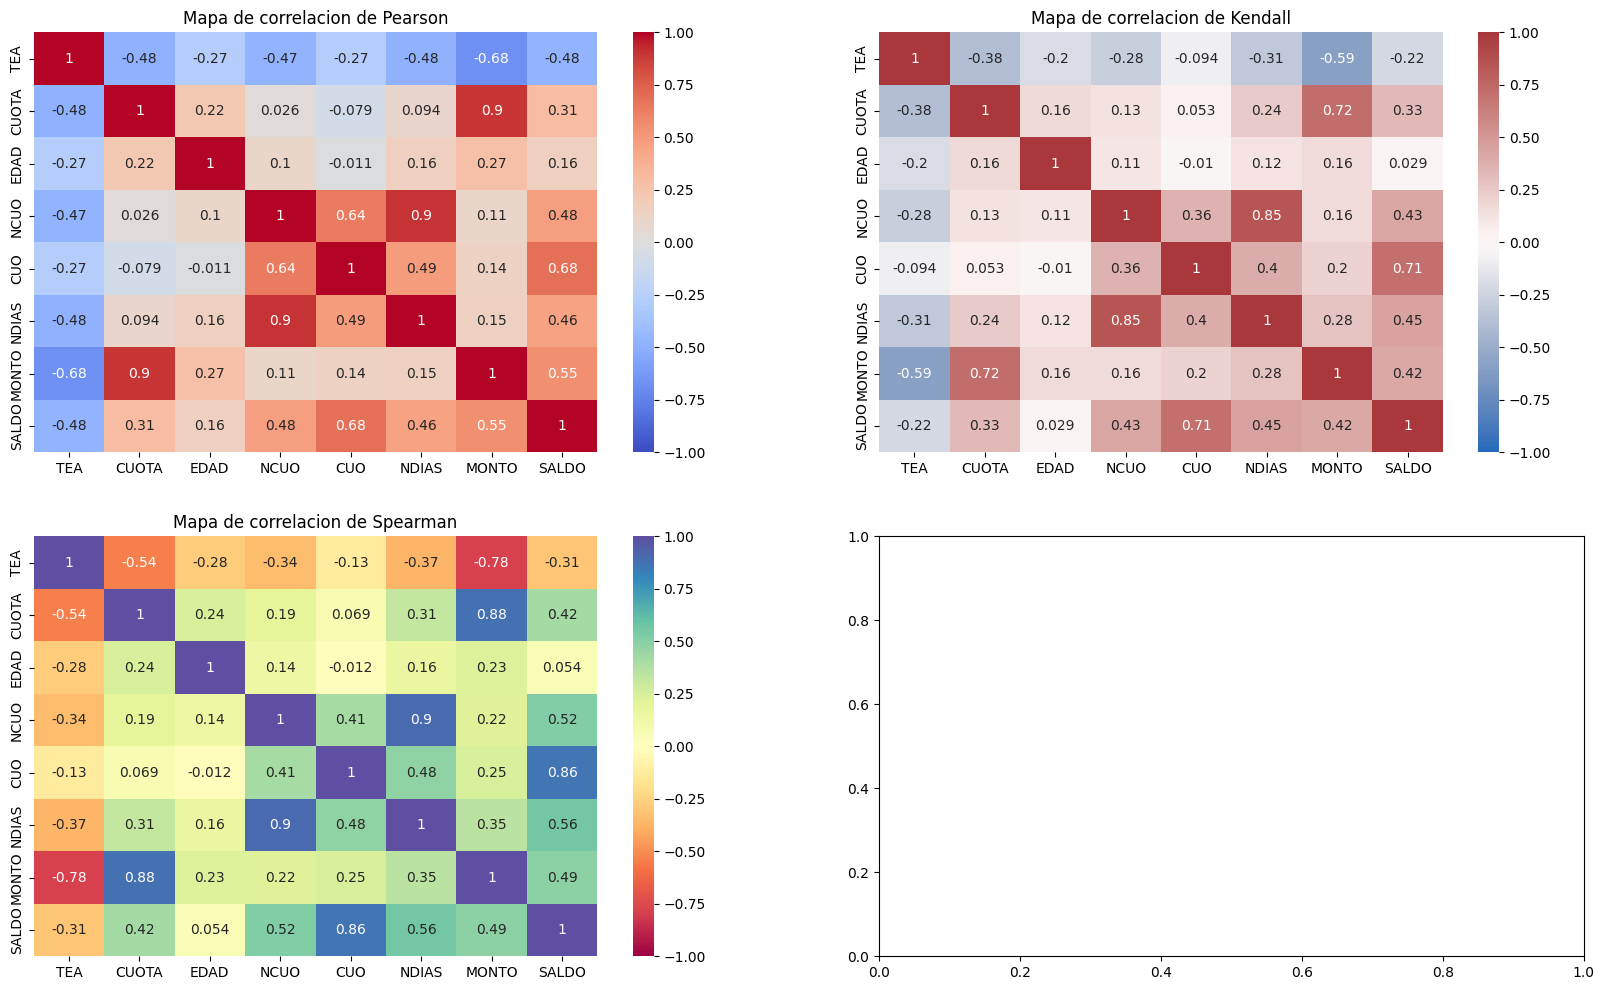

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
column_labels = visualizar_datos(n_data3)
ax = sns.heatmap(n_data3.corr(method="pearson"), vmin=-1, vmax=1,ax=axs[0,0], cmap="coolwarm",  xticklabels=column_labels, yticklabels=column_labels, annot=True);
axs[0,0].set_title('Mapa de correlacion de Pearson')
ax = sns.heatmap(n_data3.corr(method="kendall"), vmin=-1, vmax=1,ax=axs[0,1], cmap="vlag",  xticklabels=column_labels, yticklabels=column_labels, annot= True);
axs[0,1].set_title('Mapa de correlacion de Kendall')
ax = sns.heatmap(n_data3.corr(method="spearman"), vmin=-1, vmax=1,ax=axs[1,0], cmap="Spectral",xticklabels=column_labels, yticklabels=column_labels, annot=True);
axs[1,0].set_title('Mapa de correlacion de Spearman')

In [99]:
n_data3['MONTO_PRESTAMO'].corr(n_data3['EDAD'])

0.27381696797372784

<Axes: xlabel='EDAD', ylabel='MONTO_PRESTAMO'>

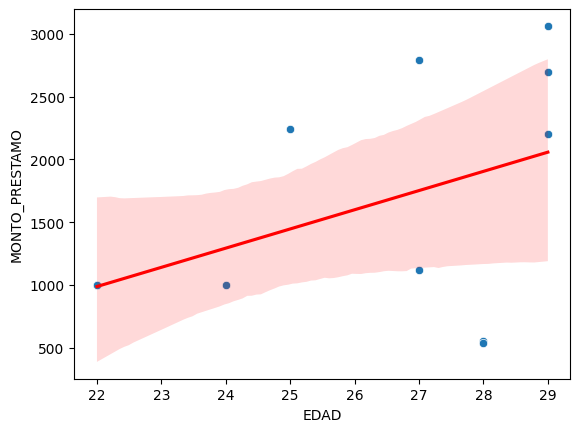

In [100]:
tax_filt = n_data3.loc[(n_data3['EDAD'] <= 30) &
                   (n_data3['EDAD'] >= 18) &
                   (n_data3['MONTO_PRESTAMO'] >= 500) &
                   (n_data3['MONTO_PRESTAMO'] <= 20000), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='EDAD', y='MONTO_PRESTAMO');
sns.regplot(data=tax_filt, x='EDAD', y='MONTO_PRESTAMO', ax=ax, color="red",scatter=False)

(0.0, 20000.0)

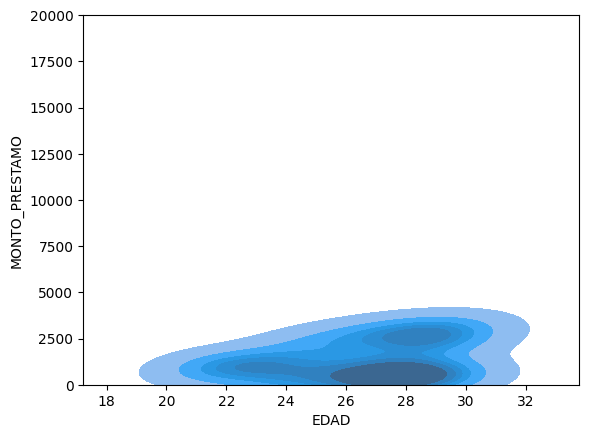

In [101]:
ax = sns.kdeplot(x=n_data3.query('EDAD >= 18 and EDAD <= 30')['EDAD'], y=n_data3['MONTO_PRESTAMO'], fill=True, levels =7)
ax.set_ylim(0, 20000)

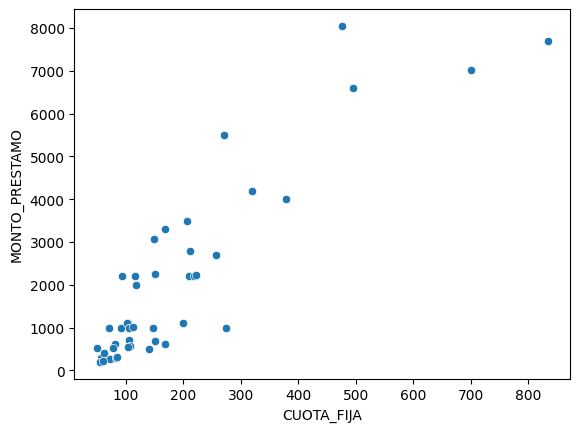

In [102]:
ax = sns.scatterplot(data=n_data3, x='CUOTA_FIJA', y='MONTO_PRESTAMO')

<Axes: xlabel='CUOTA_FIJA', ylabel='MONTO_PRESTAMO'>

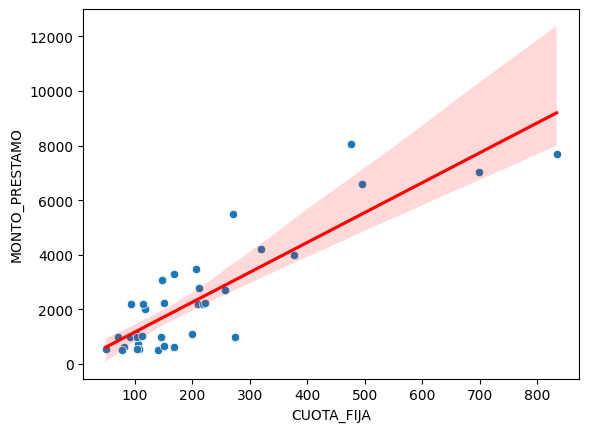

In [103]:
tax_filt = n_data3.loc[(n_data3['CUOTA_FIJA'] <= 2000) &
                   (n_data3['CUOTA_FIJA'] >= 20) &
                   (n_data3['MONTO_PRESTAMO'] >= 500) &
                   (n_data3['MONTO_PRESTAMO'] <= 10000), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='CUOTA_FIJA', y='MONTO_PRESTAMO');
sns.regplot(data=tax_filt, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=ax, color="red",scatter=False)

## DATOS MENSUALES

In [104]:
data_Frec3= data.query('NOM_FRECUENCIA == "MESES"')

In [105]:
pd.set_option('display.max_columns', None)
data_no_repro3 = data_Frec3.query('NRO_REPRO.isna()')

In [106]:
n_data_m = data_no_repro3.select_dtypes(include=[np.number])

In [107]:
n_data_m = n_data_m.drop(['CUENTA', 'AGENCIA', 'TIPO_SOCIO', 'DIAS','NRO_REPRO'], axis=1)

In [108]:
n_data_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, 0 to 9659
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TEA_INTERES             2310 non-null   float64
 1   CUOTA_FIJA              2310 non-null   float64
 2   EDAD                    2310 non-null   int64  
 3   NCUO_ATRASADAS          2310 non-null   int64  
 4   CUO_FALTANTES_VIGENTES  2310 non-null   int64  
 5   NDIAS_ATRASADOS         2310 non-null   int64  
 6   MONTO_PRESTAMO          2310 non-null   float64
 7   SALDO_PRESTAMO          2310 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 162.4 KB


In [109]:
n_data_m.describe()

TEA_INTERES    CUOTA_FIJA         EDAD  NCUO_ATRASADAS  \
count  2310.000000   2310.000000  2310.000000     2310.000000   
mean     68.625078    625.322550    39.432468        1.371861   
std      31.087251    759.669431    12.216556        3.448286   
min       0.000000     19.000000    18.000000        0.000000   
25%      45.760000    230.695000    30.000000        0.000000   
50%      56.450000    388.440000    38.000000        0.000000   
75%     100.080000    738.442500    47.000000        1.000000   
max     213.840000  11106.870000    78.000000       38.000000   

       CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  
count             2310.000000      2310.000000     2310.000000     2310.000000  
mean                 8.475758       121.439394     7029.756706     4614.086710  
std                  7.386741       317.913087    10154.321235     7412.221319  
min                  0.000000         0.000000      445.000000        0.000000  
25%                  4.000000         0.000000     1937.500000      965.640000  
50%                  7.000000         0.000000     3350.000000     2077.445000  
75%                 11.000000         6.000000     7760.000000     4905.190000  
max                 72.000000      2187.000000   145000.000000    90240.000000

In [110]:
n_data_m.corr(method="spearman")

TEA_INTERES  CUOTA_FIJA      EDAD  NCUO_ATRASADAS  \
TEA_INTERES                1.000000   -0.324766 -0.080015       -0.080378   
CUOTA_FIJA                -0.324766    1.000000  0.142219       -0.193312   
EDAD                      -0.080015    0.142219  1.000000       -0.069001   
NCUO_ATRASADAS            -0.080378   -0.193312 -0.069001        1.000000   
CUO_FALTANTES_VIGENTES     0.053968    0.211024 -0.023765        0.004853   
NDIAS_ATRASADOS           -0.080930   -0.198045 -0.071989        0.976106   
MONTO_PRESTAMO            -0.509007    0.922010  0.136273       -0.176785   
SALDO_PRESTAMO            -0.179602    0.728621  0.069901       -0.089917   

                        CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  \
TEA_INTERES                           0.053968        -0.080930   
CUOTA_FIJA                            0.211024        -0.198045   
EDAD                                 -0.023765        -0.071989   
NCUO_ATRASADAS                        0.004853         0.976106   
CUO_FALTANTES_VIGENTES                1.000000        -0.017435   
NDIAS_ATRASADOS                      -0.017435         1.000000   
MONTO_PRESTAMO                        0.360131        -0.185956   
SALDO_PRESTAMO                        0.726745        -0.108530   

                        MONTO_PRESTAMO  SALDO_PRESTAMO  
TEA_INTERES                  -0.509007       -0.179602  
CUOTA_FIJA                    0.922010        0.728621  
EDAD                          0.136273        0.069901  
NCUO_ATRASADAS               -0.176785       -0.089917  
CUO_FALTANTES_VIGENTES        0.360131        0.726745  
NDIAS_ATRASADOS              -0.185956       -0.108530  
MONTO_PRESTAMO                1.000000        0.771784  
SALDO_PRESTAMO                0.771784        1.000000

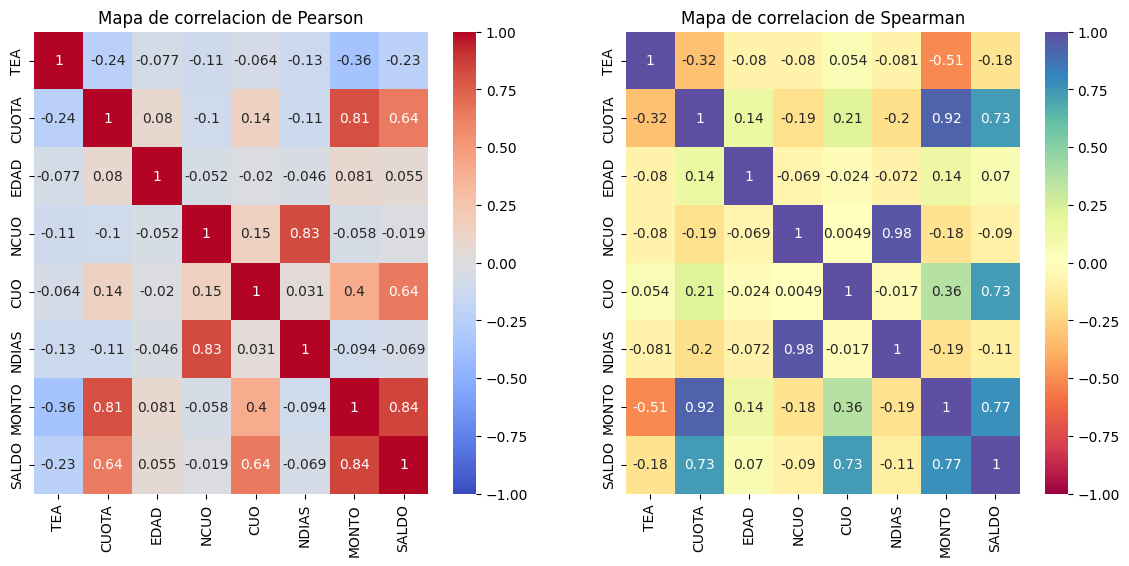

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
column_labels = visualizar_datos(n_data3)
ax = sns.heatmap(n_data_m.corr(method="pearson"), vmin=-1, vmax=1, ax=axs[0], cmap="coolwarm",annot=True,xticklabels=column_labels, yticklabels=column_labels)
axs[0].set_title('Mapa de correlacion de Pearson')
ax = sns.heatmap(n_data_m.corr(method="spearman"), vmin=-1, vmax=1, ax=axs[1], cmap="Spectral", annot=True,xticklabels=column_labels, yticklabels=column_labels)
axs[1].set_title('Mapa de correlacion de Spearman');

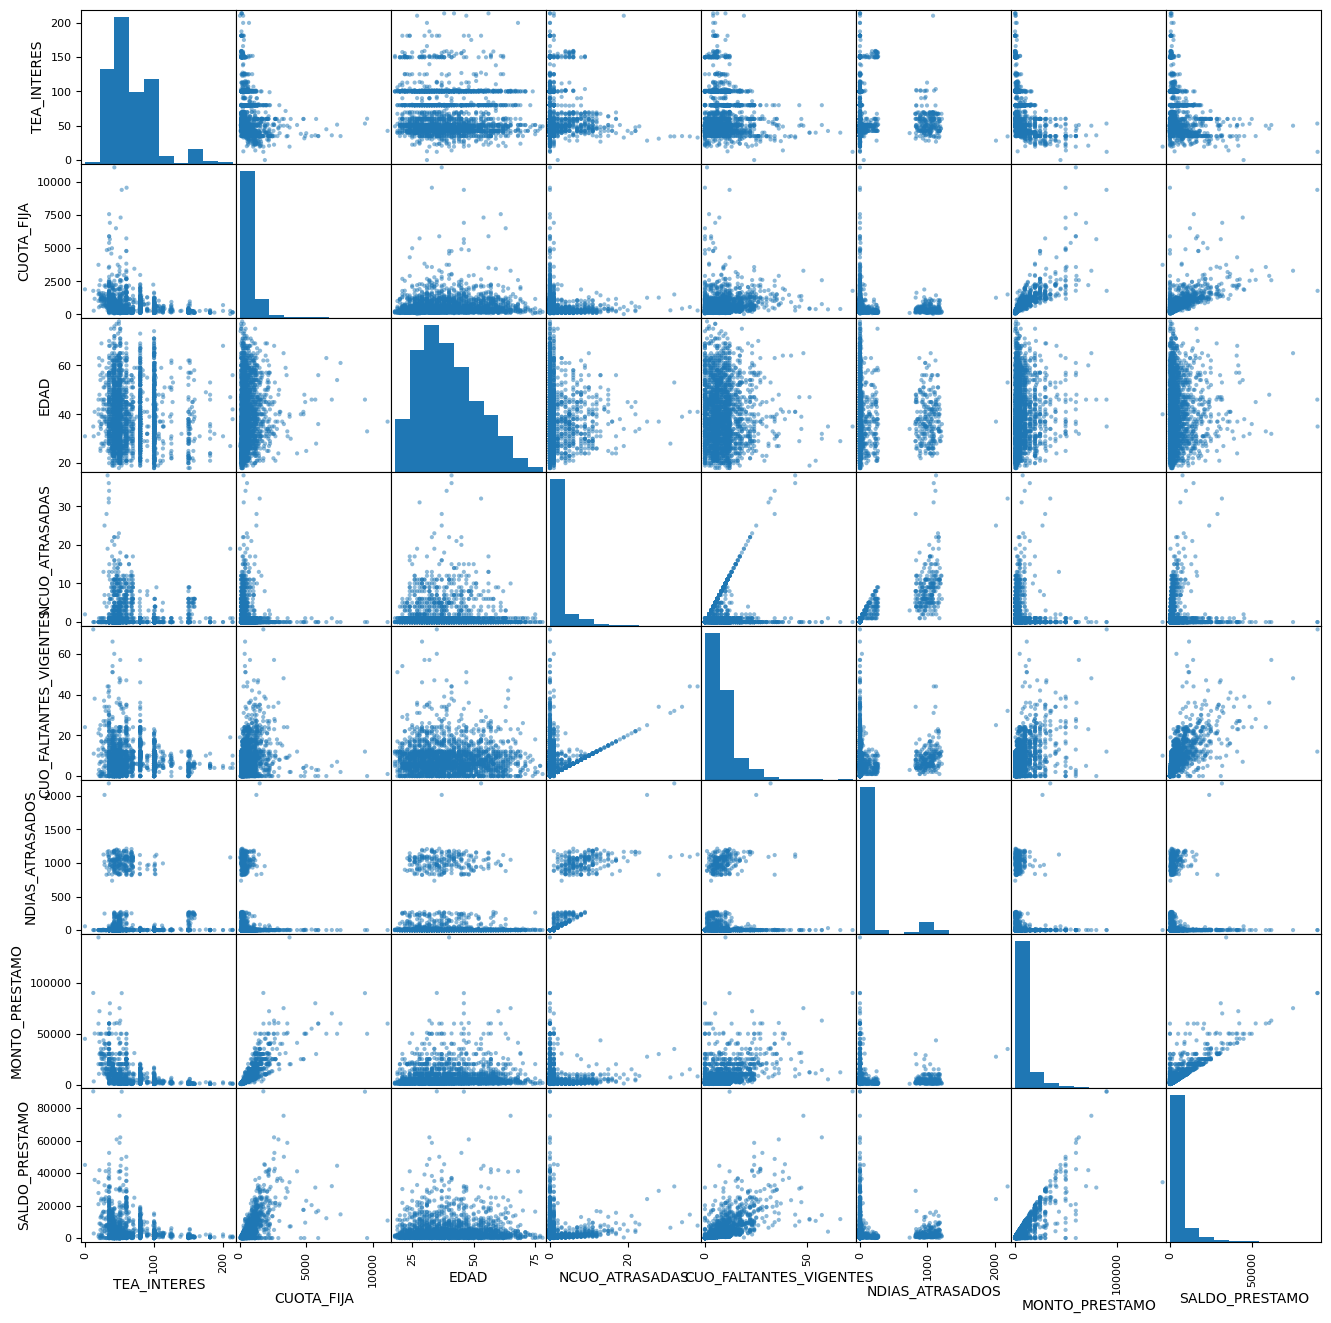

In [112]:
pd.plotting.scatter_matrix(n_data_m, figsize=(16,16),diagonal ="hist");

### TEA X MONTO PRESTAMO

In [113]:
Q1, Q2, Q3 = cuartil(n_data_m, 'MONTO_PRESTAMO')

<Axes: xlabel='TEA_INTERES', ylabel='MONTO_PRESTAMO'>

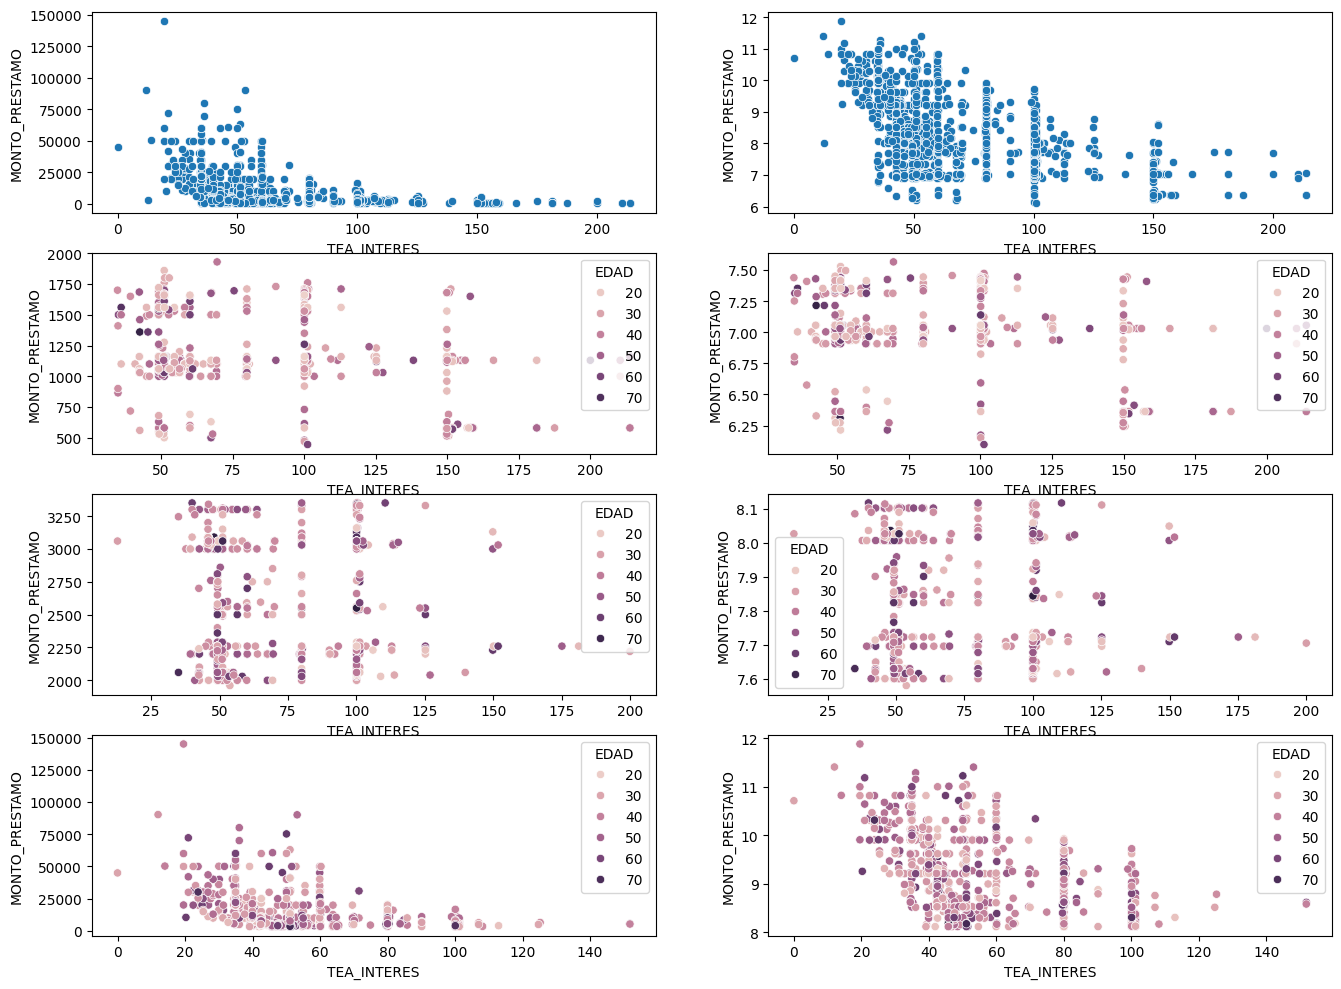

In [114]:
fig, axs = plt.subplots(4, 2, figsize = (16,12) )
sns.scatterplot(data = n_data_m, x='TEA_INTERES',y='MONTO_PRESTAMO', ax= axs[0,0])
sns.scatterplot(data = Q1, x='TEA_INTERES',y='MONTO_PRESTAMO', ax = axs[1,0], hue='EDAD')
sns.scatterplot(data = Q2, x='TEA_INTERES',y='MONTO_PRESTAMO', ax = axs[2,0], hue='EDAD' )
sns.scatterplot(data = Q3, x='TEA_INTERES',y='MONTO_PRESTAMO', ax = axs[3,0], hue='EDAD')

sns.scatterplot(data = n_data_m, x='TEA_INTERES',y = np.log(n_data_m['MONTO_PRESTAMO']), ax= axs[0,1])
sns.scatterplot(data = Q1, x='TEA_INTERES',y= np.log(n_data_m['MONTO_PRESTAMO']), ax = axs[1,1], hue='EDAD')
sns.scatterplot(data = Q2, x='TEA_INTERES',y= np.log(n_data_m['MONTO_PRESTAMO']), ax = axs[2,1], hue='EDAD' )
sns.scatterplot(data = Q3, x='TEA_INTERES',y= np.log(n_data_m['MONTO_PRESTAMO']), ax = axs[3,1], hue='EDAD')

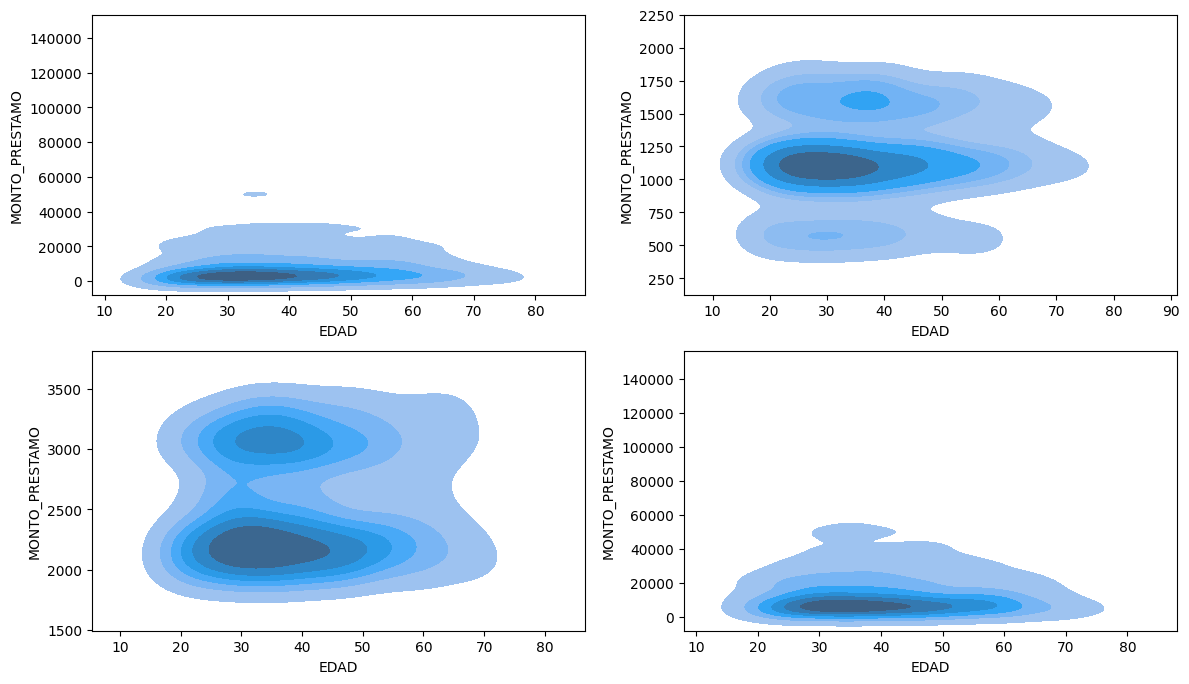

In [115]:
fig, axs = plt.subplots(2,2, figsize=(14,8))
ax = sns.kdeplot(x=n_data_m['EDAD'], y=n_data_m['MONTO_PRESTAMO'], ax = axs[0,0],fill=True, levels =7)
ax = sns.kdeplot(x=Q1['EDAD'], y=Q1['MONTO_PRESTAMO'], ax = axs[0,1] ,fill=True, levels =7)
ax = sns.kdeplot(x=Q2['EDAD'], y=Q2['MONTO_PRESTAMO'], ax = axs[1,0] ,fill=True, levels =7)
ax = sns.kdeplot(x=Q3['EDAD'], y=Q3['MONTO_PRESTAMO'], ax = axs[1,1] ,fill=True, levels =7)

### TEA INTERES X CUOTA

In [116]:
n_data_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, 0 to 9659
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TEA_INTERES             2310 non-null   float64
 1   CUOTA_FIJA              2310 non-null   float64
 2   EDAD                    2310 non-null   int64  
 3   NCUO_ATRASADAS          2310 non-null   int64  
 4   CUO_FALTANTES_VIGENTES  2310 non-null   int64  
 5   NDIAS_ATRASADOS         2310 non-null   int64  
 6   MONTO_PRESTAMO          2310 non-null   float64
 7   SALDO_PRESTAMO          2310 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 162.4 KB


In [117]:
fig, axs = plt.subplots(2, 2, figsize = (16,12) )
sns.scatterplot(data = n_data_m, x='TEA_INTERES',y=np.log(n_data_m['CUOTA_FIJA']), ax= axs[0,0])
sns.scatterplot(data = Q1, x='TEA_INTERES',y = np.log(Q1['CUOTA_FIJA']), ax = axs[0,1], hue='EDAD')
sns.scatterplot(data = Q2, x='TEA_INTERES',y = np.log(Q2['CUOTA_FIJA']), ax = axs[1,0], hue='EDAD' )
sns.scatterplot(data = Q3, x='TEA_INTERES',y = np.log(Q3['CUOTA_FIJA']), ax = axs[1,1], hue='EDAD')

<Axes: xlabel='TEA_INTERES', ylabel='CUOTA_FIJA'>

### NCUO ATRASADAS X NDIAS ATRASADOS

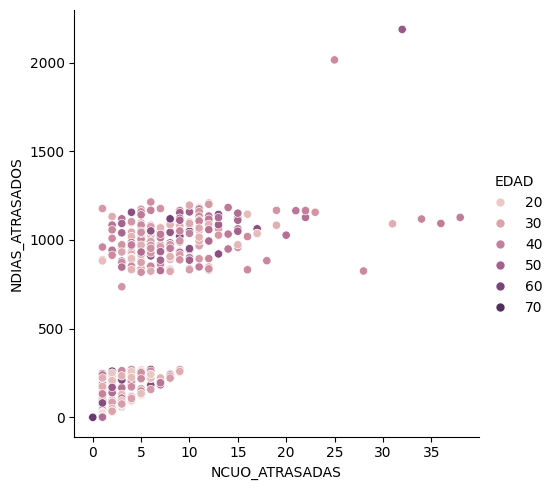

In [118]:
sns.relplot(data=n_data_m, x= 'NCUO_ATRASADAS',y='NDIAS_ATRASADOS', hue ="EDAD")
#plt.yticks(np.arange(0,1000,50))

In [119]:

Q1, Q2, Q3 = cuartil(n_data_m.query('NDIAS_ATRASADOS > 0'), 'NDIAS_ATRASADOS')

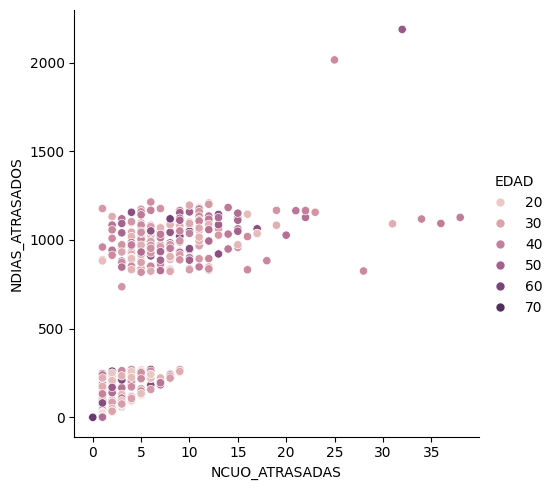

In [120]:
sns.relplot(data=n_data_m, x= 'NCUO_ATRASADAS',y='NDIAS_ATRASADOS', hue ="EDAD")

In [121]:
n_data3.nunique()

TEA_INTERES               17
CUOTA_FIJA                48
EDAD                      27
NCUO_ATRASADAS            10
CUO_FALTANTES_VIGENTES    17
NDIAS_ATRASADOS           19
MONTO_PRESTAMO            35
SALDO_PRESTAMO            39
dtype: int64

In [122]:
n_data_m['CUOTA_FIJA'].corr(n_data_m['MONTO_PRESTAMO'])

0.8101480982749709

### CUOTA FIJA X MONTO PRESTAMO

In [123]:
Q1, Q2, Q3 = cuartil(n_data_m, 'MONTO_PRESTAMO')

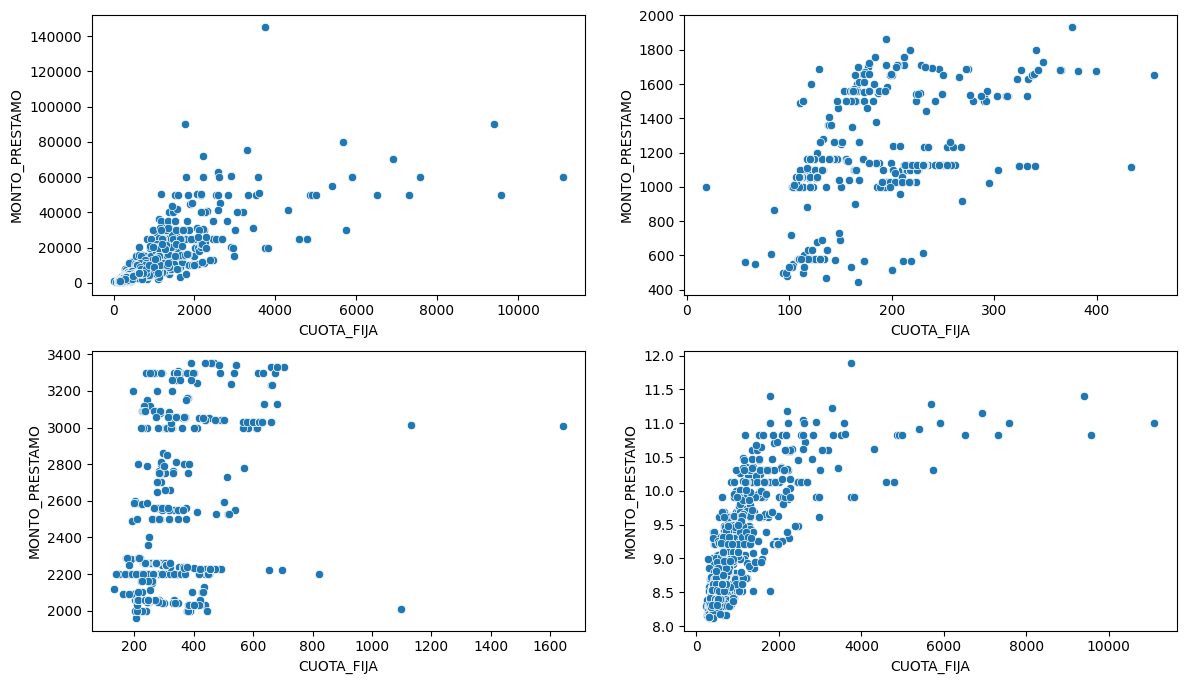

In [124]:
fig, axs = plt.subplots(2,2, figsize=(14,8))
ax = sns.scatterplot(data=n_data_m, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax = axs[0, 0] )

ax = sns.scatterplot(data = Q1, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax = axs[0, 1])

ax = sns.scatterplot(data = Q2, x='CUOTA_FIJA', y='MONTO_PRESTAMO',ax = axs[1, 0])

ax = sns.scatterplot(data = Q3, x = 'CUOTA_FIJA', y=np.log(Q3['MONTO_PRESTAMO']),ax = axs[1, 1])

<Axes: xlabel='CUOTA_FIJA', ylabel='MONTO_PRESTAMO'>

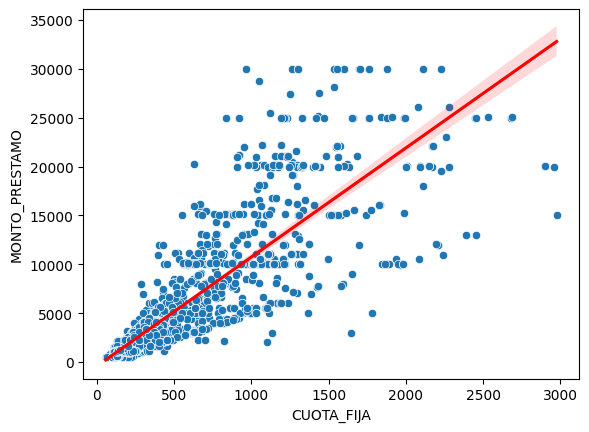

In [125]:
tax_filt = n_data_m.loc[(n_data_m['CUOTA_FIJA'] <= 3000) &
                   (n_data_m['CUOTA_FIJA'] >= 20) &
                   (n_data_m['MONTO_PRESTAMO'] >= 500) &
                   (n_data_m['MONTO_PRESTAMO'] <= 30000), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='CUOTA_FIJA', y='MONTO_PRESTAMO');
sns.regplot(data=tax_filt, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=ax, color="red",scatter=False)

### CUOTA FIJA VS SALDO PRESTAMO

In [126]:
n_data_m['CUOTA_FIJA'].corr(n_data_m['SALDO_PRESTAMO'])

0.6368928722138862

In [127]:
Q1, Q2, Q3 = cuartil(n_data_m.query('SALDO_PRESTAMO > 0'), 'SALDO_PRESTAMO')

In [128]:
fig, axs = plt.subplots(2,2, figsize=(14,8))
ax = sns.scatterplot(data=n_data_m, x='SALDO_PRESTAMO', y = np.log(n_data_m['CUOTA_FIJA']), ax = axs[0, 0] )

ax = sns.scatterplot(data = Q1, x='SALDO_PRESTAMO', y = np.log(Q1['CUOTA_FIJA']), ax = axs[0, 1])

ax = sns.scatterplot(data = Q2, x='SALDO_PRESTAMO', y = np.log(Q2['CUOTA_FIJA']),ax = axs[1, 0])

ax = sns.scatterplot(data = Q3, x = 'SALDO_PRESTAMO', y = np.log10(Q3['CUOTA_FIJA']),ax = axs[1, 1])

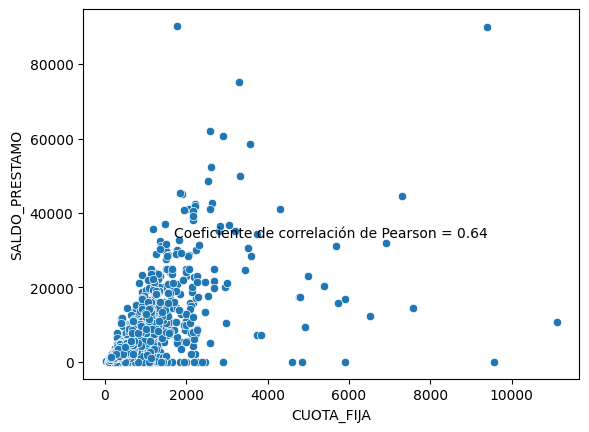

In [129]:
ax = sns.scatterplot(data = n_data_m, x='CUOTA_FIJA', y='SALDO_PRESTAMO')

coef = n_data_m['CUOTA_FIJA'].corr(n_data_m['SALDO_PRESTAMO'])

plt.text(1700,  33410, f'Coeficiente de correlación de Pearson = {coef:.2f}');

In [130]:
tax_filt = n_data_m.loc[(n_data_m['CUOTA_FIJA'] <= 3000) &
                   (n_data_m['CUOTA_FIJA'] >= 20) &
                   (n_data_m['SALDO_PRESTAMO'] >= 500) &
                   (n_data_m['SALDO_PRESTAMO'] <= 30000), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='CUOTA_FIJA', y='SALDO_PRESTAMO');
sns.regplot(data=tax_filt, x='CUOTA_FIJA', y='SALDO_PRESTAMO', ax=ax, color="red",scatter=False)

<Axes: xlabel='CUOTA_FIJA', ylabel='SALDO_PRESTAMO'>

### CUOTAS FALTANTES VIGENTES VS SALDO PRESTAMO

In [131]:
n_data_m['CUO_FALTANTES_VIGENTES'].corr(n_data_m['SALDO_PRESTAMO'])

0.6442728197310716

In [132]:
fig, axs = plt.subplots(2, 2, figsize = (14, 8))
ax = sns.scatterplot(data = n_data_m, x='CUO_FALTANTES_VIGENTES', y='SALDO_PRESTAMO', ax = axs[0,0])
ax = sns.scatterplot(data = Q1, x='CUO_FALTANTES_VIGENTES', y='SALDO_PRESTAMO', ax = axs[0,1])
ax = sns.scatterplot(data = Q2, x='CUO_FALTANTES_VIGENTES', y='SALDO_PRESTAMO', ax = axs[1,0])
ax = sns.scatterplot(data = Q3, x='CUO_FALTANTES_VIGENTES', y='SALDO_PRESTAMO', ax = axs[1,1])

<Axes: xlabel='CUOTA_FIJA', ylabel='CUO_FALTANTES_VIGENTES'>

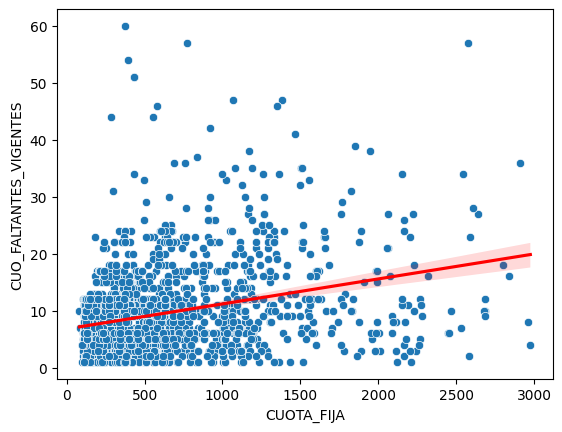

In [133]:
tax_filt = n_data_m.loc[(n_data_m['CUOTA_FIJA'] <= 3000) &
                   (n_data_m['CUOTA_FIJA'] >= 20) &
                   (n_data_m['CUO_FALTANTES_VIGENTES'] >= 1) &
                   (n_data_m['CUO_FALTANTES_VIGENTES'] <= 60), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='CUOTA_FIJA', y='CUO_FALTANTES_VIGENTES');
sns.regplot(data=tax_filt, x='CUOTA_FIJA', y='CUO_FALTANTES_VIGENTES', ax=ax, color="red",scatter=False)

### MONTO_PRESTADO VS SALDO_PRESTAMO

In [134]:
n_data3.MONTO_PRESTAMO.corr(n_data3.SALDO_PRESTAMO)

0.5482486875496666

In [135]:
ax = sns.scatterplot(data=n_data3, x='MONTO_PRESTAMO', y='SALDO_PRESTAMO')

coef = n_data3['MONTO_PRESTAMO'].corr(n_data3['SALDO_PRESTAMO'])

<Axes: xlabel='MONTO_PRESTAMO', ylabel='SALDO_PRESTAMO'>

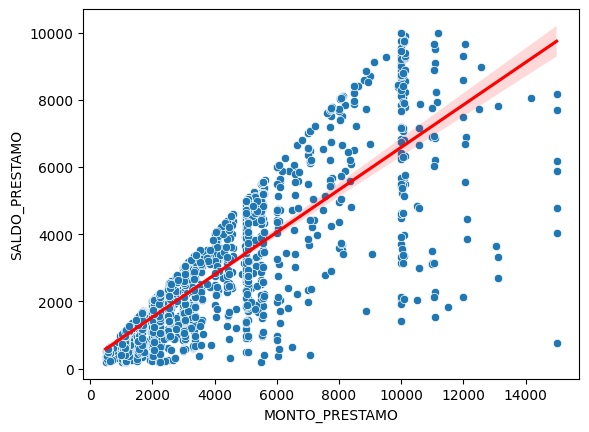

In [136]:
tax_filt = n_data_m.loc[(n_data_m['MONTO_PRESTAMO'] <= 15000) &
                   (n_data_m['MONTO_PRESTAMO'] >= 500) &
                   (n_data_m['SALDO_PRESTAMO'] >= 200) &
                   (n_data_m['SALDO_PRESTAMO'] <= 10000), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='MONTO_PRESTAMO', y='SALDO_PRESTAMO');
sns.regplot(data=tax_filt, x='MONTO_PRESTAMO', y='SALDO_PRESTAMO', ax=ax, color="red",scatter=False)